In [ ]:
# Importing the Required Libraries

# For numerical operations
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For time-related functions
import time

# For plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

# For statistical data visualization
import seaborn as sns

# For statistical functions
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# For data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# For machine learning algorithms and evaluation metrics
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For different machine learning algorithms
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# For XGBoost algorithm
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


# **Exploratory Data Analysis**

In [ ]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
#Checking the Shape
df.shape

(109025, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109025 entries, 0 to 109024
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    109025 non-null  int64  
 1   V1      109025 non-null  float64
 2   V2      109025 non-null  float64
 3   V3      109025 non-null  float64
 4   V4      109025 non-null  float64
 5   V5      109025 non-null  float64
 6   V6      109025 non-null  float64
 7   V7      109025 non-null  float64
 8   V8      109025 non-null  float64
 9   V9      109025 non-null  float64
 10  V10     109025 non-null  float64
 11  V11     109025 non-null  float64
 12  V12     109025 non-null  float64
 13  V13     109025 non-null  float64
 14  V14     109025 non-null  float64
 15  V15     109025 non-null  float64
 16  V16     109025 non-null  float64
 17  V17     109025 non-null  float64
 18  V18     109025 non-null  float64
 19  V19     109025 non-null  float64
 20  V20     109025 non-null  float64
 21  V21     10

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,...,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000
mean,44645.276707,-0.256883,-0.025148,0.682026,0.156138,-0.283840,0.096437,-0.115878,0.058907,-0.058148,...,-0.031439,-0.108487,-0.037077,0.010548,0.133002,0.025850,0.001697,0.001575,95.976655,0.002192
std,17910.956447,1.851918,1.646552,1.312689,1.342222,1.345002,1.297956,1.204303,1.228831,1.107857,...,0.739326,0.639778,0.625171,0.595426,0.439685,0.491488,0.392049,0.319122,259.985100,0.046770
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,34466.000000,-1.022536,-0.594704,0.176662,-0.711427,-0.906796,-0.647201,-0.604942,-0.134455,-0.698260,...,-0.224526,-0.535608,-0.176381,-0.323376,-0.130809,-0.323685,-0.061028,-0.004984,7.000000,0.000000
50%,46486.000000,-0.260725,0.078851,0.757593,0.184474,-0.318199,-0.156136,-0.071019,0.077647,-0.124576,...,-0.057137,-0.084788,-0.049097,0.066487,0.170840,-0.068262,0.010695,0.023386,25.000000,0.000000
75%,59079.000000,1.155066,0.739987,1.381997,1.021482,0.243535,0.490683,0.410307,0.368885,0.536933,...,0.120029,0.312712,0.080875,0.407577,0.420394,0.293750,0.084706,0.076715,86.982500,0.000000
max,71184.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
#Checking the class distribution of the target variable in percentage
df['Class'].value_counts()

0.0    108785
1.0       239
Name: Class, dtype: int64

Class
0.0    99.780782
1.0     0.219218
Name: Class, dtype: float64


<Axes: ylabel='Class'>

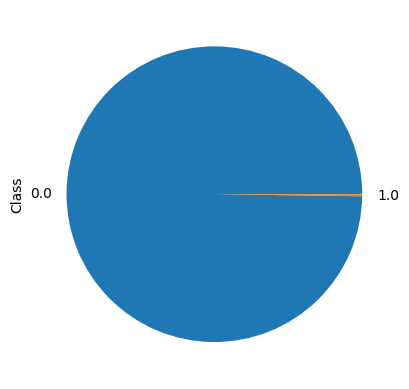

In [ ]:
#Checking the class distribution of target variable in percentage
#Checking the pie chart for Fraudulent and Legitimate Transcastions.
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [ ]:
#Checking the % distribution of Normal vs Fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fruad_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fruad_share)


99.78078221309069
0.21921778690930435


In [ ]:
# #Create a bar plot for the number and percentage of fraudulent vs non-fraudlent transcations

# # Assuming 'df' contains the loaded dataset
# plt.figure(figsize=(7, 5))
# sns.countplot(df['Class'])
# plt.title("Class Count", fontsize=20)
# plt.xlabel("Record counts by Class", fontsize=16)
# plt.ylabel("Count", fontsize=16)
# plt.show()


In [ ]:
#Checking the correlation

corr=df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.006096,-0.043226,-0.025704,-0.027687,-0.041829,-0.005107,-0.004155,0.018312,-0.240684,...,0.001910,0.011261,0.002623,0.002778,0.006939,-0.001884,-0.010343,-0.006790,0.024396,-0.015169
V1,-0.006096,1.000000,0.055204,0.217870,-0.064325,0.016637,0.062062,0.079050,-0.005676,-0.056692,...,-0.025583,-0.052002,-0.074196,-0.013779,0.196915,0.019171,-0.022279,0.154569,-0.251874,-0.144920
V2,-0.043226,0.055204,1.000000,-0.080521,0.042988,-0.041228,0.017692,-0.024520,0.008183,-0.007932,...,-0.011216,-0.028023,0.015083,-0.024361,-0.091957,-0.027058,-0.002699,0.024198,-0.554383,0.119698
V3,-0.025704,0.217870,-0.080521,1.000000,-0.087155,0.193879,-0.068961,0.191354,-0.121890,0.117101,...,0.026530,0.248212,0.045306,0.025757,-0.185427,0.041544,-0.066695,0.035311,-0.232324,-0.298411
V4,-0.027687,-0.064325,0.042988,-0.087155,1.000000,-0.002679,-0.042947,-0.018094,0.040752,0.045167,...,0.021257,0.030833,-0.009995,0.000979,-0.001972,-0.024761,0.045239,-0.007272,0.096814,0.160327
V5,-0.041829,0.016637,-0.041228,0.193879,-0.002679,1.000000,0.040962,-0.040482,-0.021163,0.037034,...,-0.055100,-0.086378,0.015593,-0.015833,-0.009395,-0.043933,-0.019452,0.000745,-0.400129,-0.138950
V6,-0.005107,0.062062,0.017692,-0.068961,-0.042947,0.040962,1.000000,0.054129,-0.044029,0.042512,...,0.020634,0.045327,-0.015853,-0.001542,0.048887,0.004020,-0.010390,-0.010534,0.208503,-0.058958
V7,-0.004155,0.079050,-0.024520,0.191354,-0.018094,-0.040482,0.054129,1.000000,0.001501,0.043842,...,-0.009067,-0.040322,0.072905,0.001953,-0.094124,-0.032670,-0.093181,-0.044572,0.384297,-0.242952
V8,0.018312,-0.005676,0.008183,-0.121890,0.040752,-0.021163,-0.044029,0.001501,1.000000,-0.025989,...,0.002376,0.041726,-0.025920,0.004336,0.013556,0.007209,0.003463,0.020332,-0.093969,0.058783
V9,-0.240684,-0.056692,-0.007932,0.117101,0.045167,0.037034,0.042512,0.043842,-0.025989,1.000000,...,0.001904,0.042324,-0.048971,0.013204,0.120610,0.109727,-0.030137,-0.028266,-0.018583,-0.113786


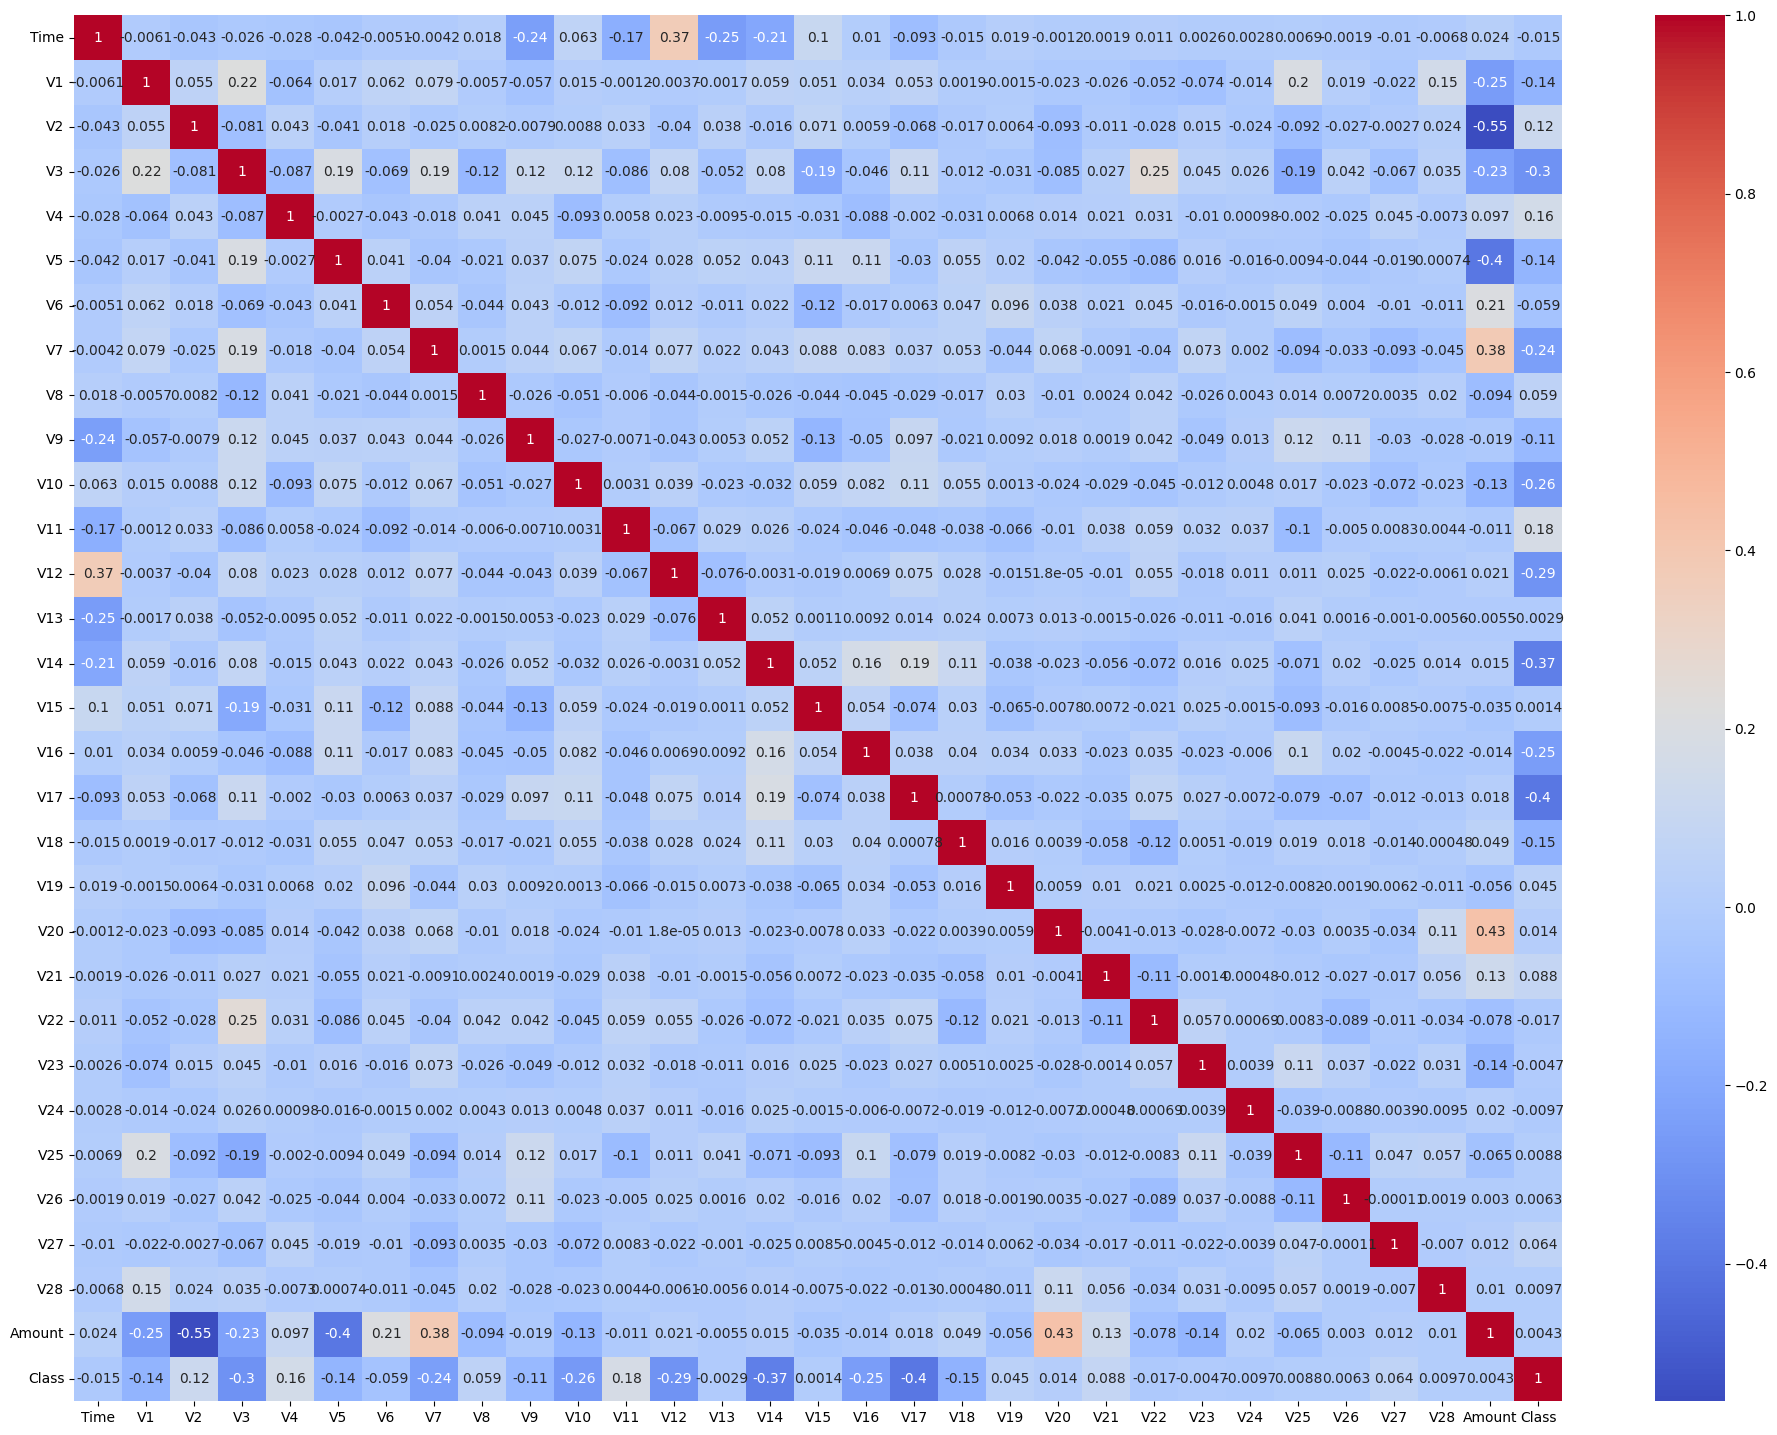

In [ ]:
#Checking the correlation in heatmap
plt.figure(figsize=(24,18))

sns.heatmap(corr, cmap="coolwarm" , annot=True)
plt.show()

In [ ]:
#As time is given in relative function, we are using pandas. Timedelta which represents a duration.

Delta_Time=pd.to_timedelta(df['Time'], unit='s')

#Create dervied columns Mins and hours

df['Time_Day']=(Delta_Time.dt.components.days).astype(int)
df['Time_Hour']=(Delta_Time.dt.components.hours).astype(int)
df['Time_Min']=(Delta_Time.dt.components.minutes).astype(int)


In [ ]:
#Dropping un necessary columns
#We will drop Time, as we have the Day/Hour/Minutes from the time column
df.drop('Time',axis=1,inplace=True)
#We will keep only derived column hour, as day/minutes might not be very useful
df.drop(['Time_Day','Time_Min'],axis=1, inplace=True)


In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
count,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,109025.000000,...,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109025.000000
mean,-0.256883,-0.025148,0.682026,0.156138,-0.283840,0.096437,-0.115878,0.058907,-0.058148,-0.019842,...,-0.108487,-0.037077,0.010548,0.133002,0.025850,0.001697,0.001575,95.976655,0.002192,11.914992
std,1.851918,1.646552,1.312689,1.342222,1.345002,1.297956,1.204303,1.228831,1.107857,1.059723,...,0.639778,0.625171,0.595426,0.439685,0.491488,0.392049,0.319122,259.985100,0.046770,4.961970
min,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000,0.000000
25%,-1.022536,-0.594704,0.176662,-0.711427,-0.906796,-0.647201,-0.604942,-0.134455,-0.698260,-0.488850,...,-0.535608,-0.176381,-0.323376,-0.130809,-0.323685,-0.061028,-0.004984,7.000000,0.000000,9.000000
50%,-0.260725,0.078851,0.757593,0.184474,-0.318199,-0.156136,-0.071019,0.077647,-0.124576,-0.093831,...,-0.084788,-0.049097,0.066487,0.170840,-0.068262,0.010695,0.023386,25.000000,0.000000,12.000000
75%,1.155066,0.739987,1.381997,1.021482,0.243535,0.490683,0.410307,0.368885,0.536933,0.434692,...,0.312712,0.080875,0.407577,0.420394,0.293750,0.084706,0.076715,86.982500,0.000000,16.000000
max,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.249433,...,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000,19.000000


# Splitting the data into train & test data

In [ ]:
# The traget variable we're taking is "class" considering it as "Y", and the rest will be x so removing 'class' from rest

y=df['Class']
X=df.drop(['Class'],axis=1)



In [ ]:
#Checking some rows of X
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [ ]:
#Splitting the dataset into train and train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.20)

**Preserve x_test & y_test to evaluate on the test data once you build the model**

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

239.0
185.0
54.0


**Plotting the distribution of a variable**

In [ ]:
#Accumulatting all the column names under one variable
cols=list(X.columns.values)

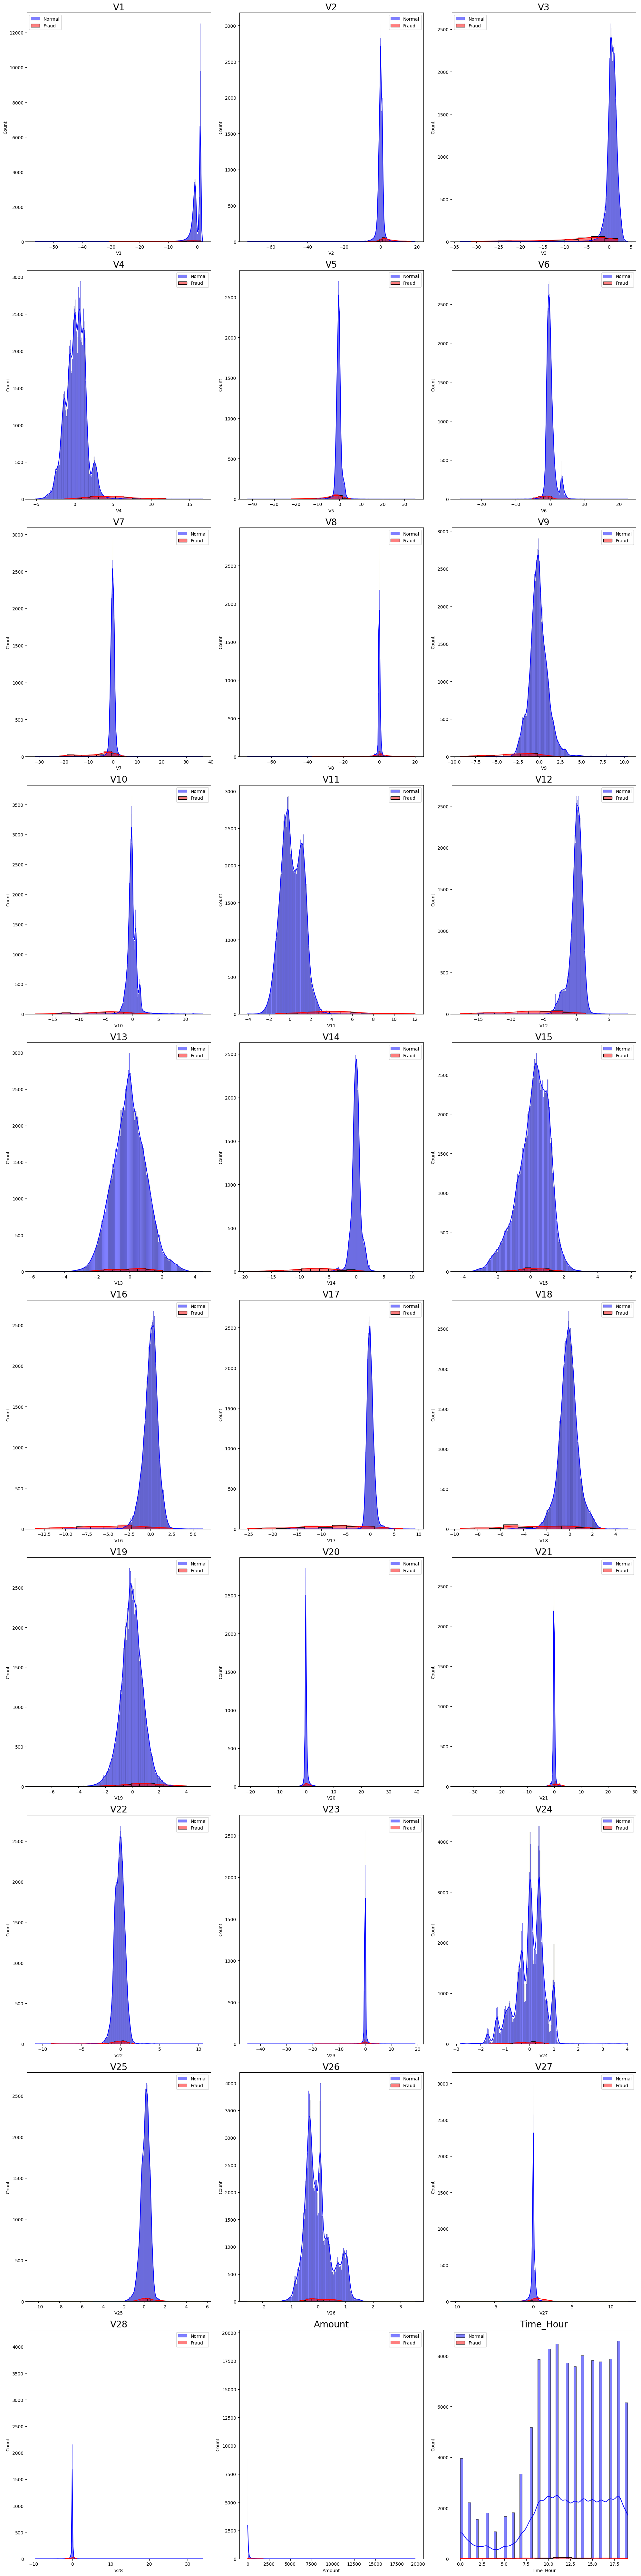

In [ ]:
# Plot the histogram of values from the dataset to see the skewness
normal_records = df.Class == 0
fraud_records = df.Class == 1

# Calculate the number of rows needed based on the number of columns
num_rows = (len(cols) + 2) // 3

plt.figure(figsize=(20, 8 * num_rows))
for n, col in enumerate(cols):
    plt.subplot(num_rows, 3, n + 1)
    sns.histplot(df[col][normal_records], color='blue', kde=True, label='Normal')
    sns.histplot(df[col][fraud_records], color='red', kde=True, label='Fraud')
    plt.title(col, fontsize=20)
    plt.legend()
plt.tight_layout()
plt.show()


# **Model Building**

In [ ]:
# Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Methodology', 'Model', 'Accuracy', 'ROC AUC', 'Threshold'])


In [ ]:
#Create a common functions to plot confusion matrix
def Plot_confusion_matrix(y_test, pred_test):
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    categoryNames = ['Non-Fraudulent', 'Fraudulent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=12, ha='center', va='center')
    plt.show()


In [ ]:
import time
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn import metrics

def buildAndRunLogisticModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Logistic Regression with L2 penalty
    num_C = list(np.power(10.0, np.arange(-10, 10)))
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

    # Logistic Regression with L2 penalty
    searchCV_12 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',  # Change to 'l2' or 'none'
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        tol=10,
    )
    searchCV_12.fit(X_train, y_train)

    # Logistic Regression with L1 penalty
    searchCV_11 = linear_model.LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',  # This line specifies L1 penalty
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver='saga',  # Change solver to 'saga' for L1 penalty
        tol=10,
    )
    searchCV_11.fit(X_train, y_train)

    print('Max auc_roc for L1:', searchCV_11.scores_[1].mean(axis=0).max())
    print('Max auc_roc for L2:', searchCV_12.scores_[1].mean(axis=0).max())

    print("Parameters for L1 regularizations")
    print(searchCV_11.coef_)
    print(searchCV_11.intercept_)
    print(searchCV_11.scores_)

    print("Parameters for L2 regularizations")
    print(searchCV_12.coef_)
    print(searchCV_12.intercept_)
    print(searchCV_12.scores_)

    # Find predicted values
    y_pred_11 = searchCV_11.predict(X_test)
    y_pred_12 = searchCV_12.predict(X_test)

    # Find predicted probabilities
    y_pred_probs_11 = searchCV_11.predict_proba(X_test)[:, 1]
    y_pred_probs_12 = searchCV_12.predict_proba(X_test)[:, 1]

    # Accuracy of L2/L1 models
    Accuracy_12 = metrics.accuracy_score(y_pred=y_pred_12, y_true=y_test)
    Accuracy_11 = metrics.accuracy_score(y_pred=y_pred_11, y_true=y_test)

    print("Accuracy of Logistic model with L2 regularization: {:.4f}".format(Accuracy_12))
    print("Accuracy of Logistic model with L1 regularization: {:.4f}".format(Accuracy_11))

    # Confusion Matrix and Classification Report for L2
    print("Confusion Matrix for L2 regularization:")
    print("Classification Report for L2 regularization:")
    print(classification_report(y_test, y_pred_12))

    # Confusion Matrix and Classification Report for L1
    print("Confusion Matrix for L1 regularization:")
    print("Classification Report for L1 regularization:")
    print(classification_report(y_test, y_pred_11))

    # ROC AUC for L2 regularization
    roc_auc_l2 = roc_auc_score(y_test, y_pred_probs_12)
    print("l2 roc_value: {:.4f}".format(roc_auc_l2))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_12)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l2 threshold: {:.4f}".format(threshold))

    # ROC AUC for L1 regularization
    roc_auc_l1 = roc_auc_score(y_test, y_pred_probs_11)
    print("l1 roc_value: {:.4f}".format(roc_auc_l1))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_11)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l1 threshold: {:.4f}".format(threshold))

    return df_Results

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # KNN model
    knn = KNeighborsClassifier(n_neighbors=5, n_jobs=16)
    knn.fit(X_train, y_train)

    # Model score
    score = knn.score(X_test, y_test)
    print("Model score:")
    print(score)

    # Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)

    print("Confusion Matrix:")
    Plot_confusion_matrix(y_test, y_pred)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Predicted probabilities
    knn_probs = knn.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {:.4f}".format(knn_roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("KNN threshold: {:.4f}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset: {:.1%}".format(roc_auc))

    plt.plot(fpr, tpr, label="Test, auc={:.4f}".format(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Update results DataFrame
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,
                                                 'Model': 'KNN',
                                                 'Accuracy': score,
                                                 'roc_value': knn_roc_value},
                                                index=[0]))

    return df_Results


In [ ]:
from sklearn.tree import DecisionTreeClassifier

def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate Decision Tree model with 'gini' & 'entropy' criteria
    criteria = ['gini', 'entropy']
    scores = {}

    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)

        scores[c] = test_score

        print("{} score: {:.4f}".format(c, test_score))
        print("Confusion Matrix:")
        Plot_confusion_matrix(y_test, y_pred)
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("{} roc_value: {:.4f}".format(c, tree_roc_value))

        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr - fpr)]
        print("Tree threshold: {:.4f}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset: {:.1%}".format(roc_auc))

        plt.plot(fpr, tpr, label="Test, auc={:.4f}".format(roc_auc))

    plt.legend(loc=4)
    plt.show()

    return df_Results


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate Random Forest model
    # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)

    # Fit on training data
    RF_model.fit(X_train, y_train)

    # Evaluate model on test data
    RF_test_score = RF_model.score(X_test, y_test)

    # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print('Model Accuracy: {:.4f}'.format(RF_test_score))

    # Confusion Matrix
    print("Confusion Matrix:")
    Plot_confusion_matrix(y_test, rf_predictions)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, rf_predictions))

    # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    roc_value = roc_auc_score(y_test, rf_probs)
    print("Random Forest ROC AUC: {:.4f}".format(roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("Random Forest Threshold: {:.4f}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC AUC for the test dataset: {:.1%}".format(roc_auc))

    plt.plot(fpr, tpr, label="Test, auc={:.4f}".format(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results to DataFrame
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,
                                                 'Model': 'Random Forest',
                                                 'Accuracy': RF_test_score,
                                                 'roc_value': roc_value},
                                                index=[0]))

    return df_Results


In [ ]:
from xgboost import XGBClassifier

def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate XGBoost model
    # Create XGBoost model
    XGBmodel = XGBClassifier(random_state=42)

    # Fit on training data
    XGBmodel.fit(X_train, y_train)

    # Evaluate model on test data
    y_pred = XGBmodel.predict(X_test)
    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {:.4f}'.format(XGB_test_score))

    # Confusion Matrix
    print("Confusion Matrix:")
    Plot_confusion_matrix(y_test, y_pred)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)
    print("XGBoost ROC AUC: {:.4f}".format(XGB_roc_value))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("XGBoost Threshold: {:.4f}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC AUC for the test dataset: {:.1%}".format(roc_auc))

    plt.plot(fpr, tpr, label="Test, auc={:.4f}".format(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results to DataFrame
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,
                                                 'Model': 'XGBoost',
                                                 'Accuracy': XGB_test_score,
                                                 'roc_value': XGB_roc_value},
                                                index=[0]))

    return df_Results


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

def buildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate SVM model with sigmoid kernel
    clf = SVC(kernel='sigmoid', probability=True, random_state=42)

    # Fit the SVM model
    clf.fit(X_train, y_train)

    # Predict on test data
    y_pred_SVM = clf.predict(X_test)

    # Calculate accuracy score
    SVM_Score = accuracy_score(y_test, y_pred_SVM)
    print("Accuracy Score: {:.4f}".format(SVM_Score))

    # Confusion Matrix
    print("Confusion Matrix:")
    Plot_confusion_matrix(y_test, y_pred_SVM)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_SVM))

    # Probabilities for each class
    svm_probs = clf.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC
    roc_value = roc_auc_score(y_test, svm_probs)
    print("SVM ROC AUC: {:.4f}".format(roc_value))

    fpr, tpr, thresholds = roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("SVM Threshold: {:.4f}".format(threshold))

    roc_auc = auc(fpr, tpr)
    print("ROC AUC for the test dataset: {:.1%}".format(roc_auc))

    plt.plot(fpr, tpr, label="Test, auc={:.4f}".format(roc_auc))
    plt.legend(loc=4)
    plt.show()

    # Append results to DataFrame
    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,
                                                 'Model': 'SVM',
                                                 'Accuracy': SVM_Score,
                                                 'roc_value': roc_value},
                                                index=[0]))
    return df_Results


In [ ]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)

# X is the feature set and y is the target

for train_index, test_index in rkf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     0      1      2 ... 109021 109022 109023] TEST: [     3      8     11 ... 109016 109017 109024]
TRAIN: [     0      1      2 ... 109022 109023 109024] TEST: [    19     28     31 ... 109006 109012 109014]
TRAIN: [     2      3      6 ... 109020 109022 109024] TEST: [     0      1      4 ... 109015 109021 109023]
TRAIN: [     0      1      2 ... 109022 109023 109024] TEST: [     7      9     17 ... 109002 109013 109018]
TRAIN: [     0      1      3 ... 109021 109023 109024] TEST: [     2      6     10 ... 109019 109020 109022]
TRAIN: [     0      1      2 ... 109022 109023 109024] TEST: [     6      7     10 ... 109009 109010 109012]
TRAIN: [     0      2      3 ... 109018 109023 109024] TEST: [     1     12     20 ... 109020 109021 109022]
TRAIN: [     0      1      3 ... 109020 109021 109022] TEST: [     2      8     17 ... 109018 109023 109024]
TRAIN: [     0      1      2 ... 109022 109023 109024] TEST: [     3      4      9 ... 109004 109006 109017]
TRAIN: [     1     

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.9824175135906394
Max auc_roc for L2: 0.9822183796960038
Parameters for L1 regularizations
[[ 1.59919329e-02  7.57959273e-03 -4.47972836e-02  1.16296007e-01
   3.82709968e-02 -1.44938677e-02 -1.62435549e-02 -6.66865431e-02
  -5.52577764e-02 -1.00574839e-01  7.18174380e-02 -1.42576994e-01
  -2.71524478e-02 -2.52004060e-01  7.30065232e-03 -5.62653356e-02
  -1.04031698e-01 -1.31503133e-02 -1.35361997e-02 -1.61330244e-02
   3.65734139e-02  1.53348630e-02  2.28268639e-03 -8.87464610e-03
  -1.09153099e-02  2.74163149e-02 -6.83881557e-03 -4.54092417e-03
   7.77479255e-03  9.08625584e-05]]
[-5.21082227]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.82728279, 0.92080166, 0.95992308,
        0.97025224, 0.97319739, 0.97398961, 0.97500559, 0.97540473,
        0.97565268, 0.97564058, 0.97567082, 0.9754894 , 0.97528983],
       [0.5       , 0.5       , 0.5       , 0.5  

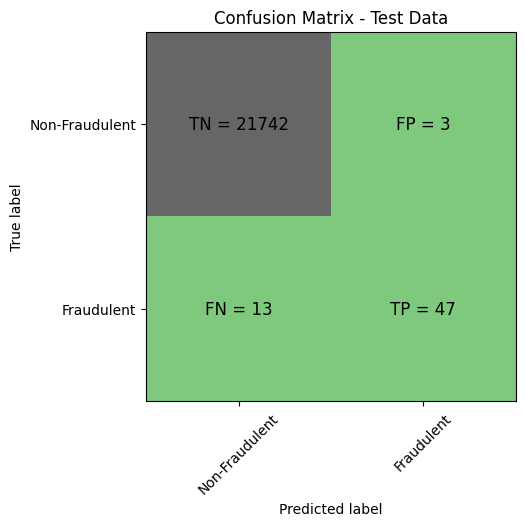

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.94      0.78      0.85        60

    accuracy                           1.00     21805
   macro avg       0.97      0.89      0.93     21805
weighted avg       1.00      1.00      1.00     21805

KNN roc_value: 0.9332
KNN threshold: 0.2000
ROC for the test dataset: 93.3%


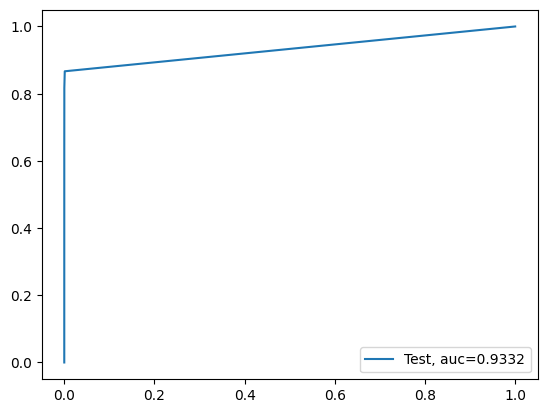

Time Taken by KNN Model: 39.33653521537781 seconds
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9990
Confusion Matrix:


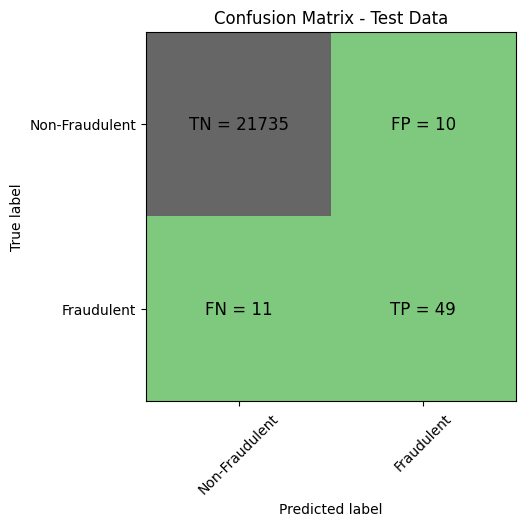

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.83      0.82      0.82        60

    accuracy                           1.00     21805
   macro avg       0.92      0.91      0.91     21805
weighted avg       1.00      1.00      1.00     21805

gini roc_value: 0.9081
Tree threshold: 1.0000
ROC for the test dataset: 90.8%
entropy score: 0.9990
Confusion Matrix:


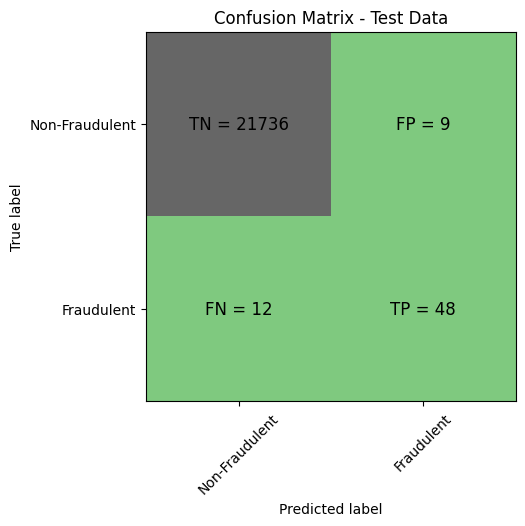

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.84      0.80      0.82        60

    accuracy                           1.00     21805
   macro avg       0.92      0.90      0.91     21805
weighted avg       1.00      1.00      1.00     21805

entropy roc_value: 0.8998
Tree threshold: 1.0000
ROC for the test dataset: 90.0%


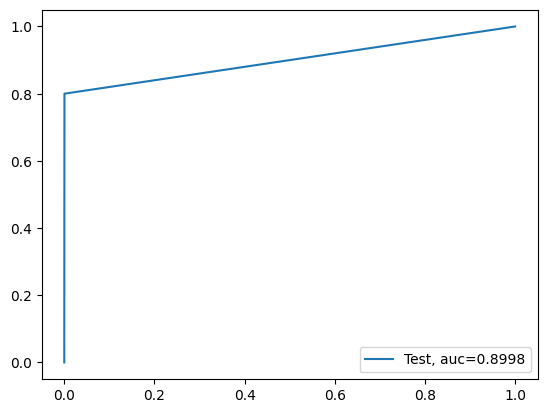

Time Taken by Decision Tree Models: 9.96296215057373 seconds
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993
Confusion Matrix:


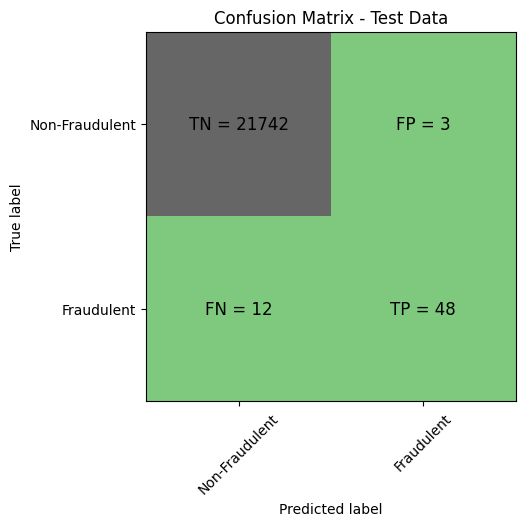

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.94      0.80      0.86        60

    accuracy                           1.00     21805
   macro avg       0.97      0.90      0.93     21805
weighted avg       1.00      1.00      1.00     21805

Random Forest ROC AUC: 0.9487
Random Forest Threshold: 0.0200
ROC AUC for the test dataset: 94.9%


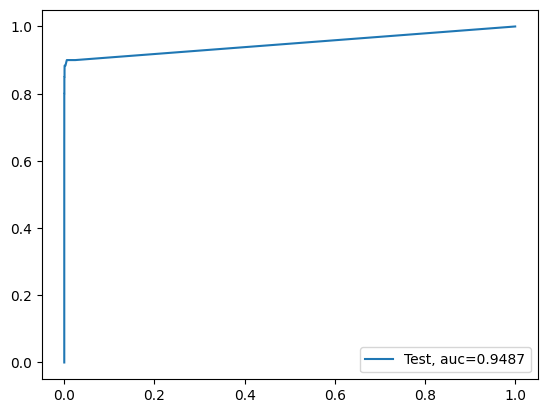

Time Taken by Random Forest Model: 57.93695259094238 seconds
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993
Confusion Matrix:


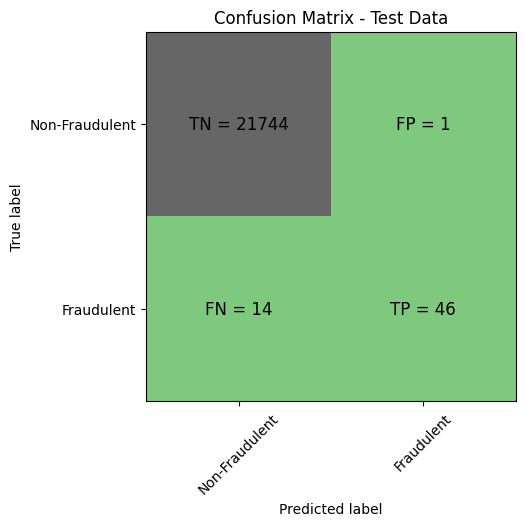

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.98      0.77      0.86        60

    accuracy                           1.00     21805
   macro avg       0.99      0.88      0.93     21805
weighted avg       1.00      1.00      1.00     21805

XGBoost ROC AUC: 0.9695
XGBoost Threshold: 0.0011
ROC AUC for the test dataset: 96.9%


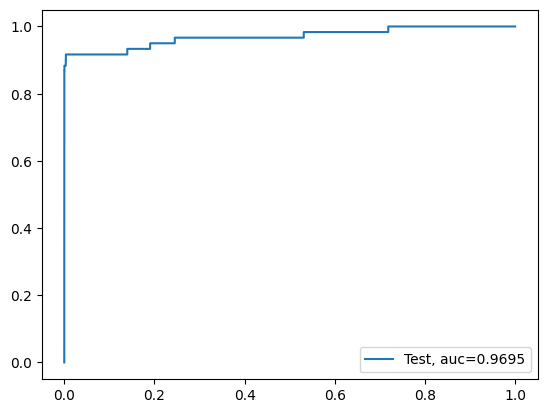

Time Taken by XGBoost Model: 3.4081132411956787 seconds
------------------------------------------------------------
SVM Model with Sigmoid Kernel
Accuracy Score: 0.9978
Confusion Matrix:


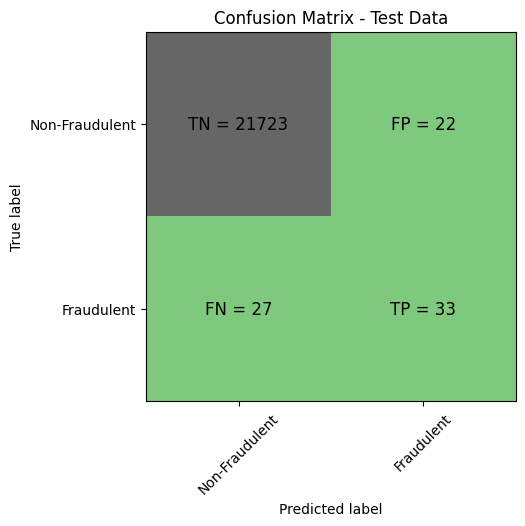

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.60      0.55      0.57        60

    accuracy                           1.00     21805
   macro avg       0.80      0.77      0.79     21805
weighted avg       1.00      1.00      1.00     21805

SVM ROC AUC: 0.7386
SVM Threshold: 0.0058
ROC AUC for the test dataset: 73.9%


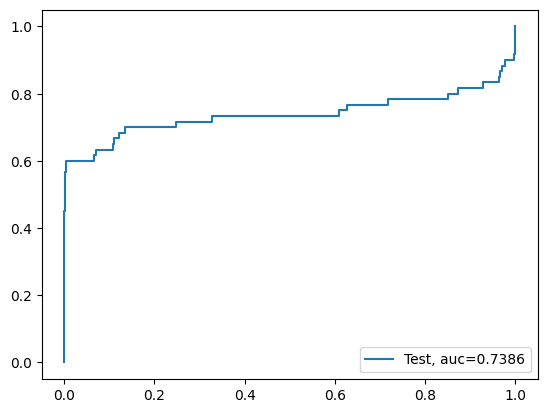

Time Taken by SVM Model: 21.224131107330322 seconds


In [ ]:
import time
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values in the training and test data
imputer = SimpleImputer(strategy='mean')  # You can change the strategy as needed

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train_cv)
X_test_imputed = imputer.transform(X_test_cv)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Handle missing values in the target variable (if any)
target_imputer = SimpleImputer(strategy='mean')
y_train_cv_imputed = target_imputer.fit_transform(y_train_cv.values.reshape(-1, 1)).flatten()
y_test_cv_imputed = target_imputer.transform(y_test_cv.values.reshape(-1, 1)).flatten()

# Convert continuous labels to binary labels
threshold = 0.5
y_train_cv_binary = (y_train_cv_imputed > threshold).astype(int)
y_test_cv_binary = (y_test_cv_imputed > threshold).astype(int)

# Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
# Now pass the imputed data to the model function
df_Results = buildAndRunLogisticModels(df_Results, "RepeatedKFold Cross Validation", X_train_scaled, y_train_cv_binary, X_test_scaled, y_test_cv_binary)
print("Time Taken by Logistic Regression Model: %s seconds" % (time.time() - start_time))
print('-'*60)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKFold Cross Validation", X_train_scaled, y_train_cv_binary, X_test_scaled, y_test_cv_binary)
print("Time Taken by KNN Model: %s seconds" % (time.time() - start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "RepeatedKFold Cross Validation", X_train_scaled, y_train_cv_binary, X_test_scaled, y_test_cv_binary)
print("Time Taken by Decision Tree Models: %s seconds" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "RepeatedKFold Cross Validation", X_train_scaled, y_train_cv_binary, X_test_scaled, y_test_cv_binary)
print("Time Taken by Random Forest Model: %s seconds" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "RepeatedKFold Cross Validation", X_train_scaled, y_train_cv_binary, X_test_scaled, y_test_cv_binary)
print("Time Taken by XGBoost Model: %s seconds" % (time.time() - start_time))
print('-'*60)

# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "RepeatedKFold Cross Validation", X_train_scaled, y_train_cv_binary, X_test_scaled, y_test_cv_binary)
print("Time Taken by SVM Model: %s seconds" % (time.time() - start_time))


In [ ]:
df_Results


,Methodology,Model,Accuracy,ROC AUC,Threshold,roc_value
0,RepeatedKFold Cross Validation,KNN,0.999266,NaN,NaN,0.933196
0,RepeatedKFold Cross Validation,Random Forest,0.999312,NaN,NaN,0.948673
0,RepeatedKFold Cross Validation,XGBoost,0.999312,NaN,NaN,0.969454
0,RepeatedKFold Cross Validation,SVM,0.997753,NaN,NaN,0.738633


Results


# **Perform cross validation with StratifiedKFold**

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=None)

# Now, perform the cross-validation split
for train_index, test_index in kf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_KF_cv, X_test_KF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_KF_cv, y_test_KF_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     0      3      4 ... 109022 109023 109024] TEST: [     1      2      5 ... 109011 109018 109021]
TRAIN: [     0      1      2 ... 109022 109023 109024] TEST: [     9     17     18 ... 109004 109010 109017]
TRAIN: [     0      1      2 ... 109020 109021 109024] TEST: [     7     10     22 ... 109016 109022 109023]
TRAIN: [     0      1      2 ... 109022 109023 109024] TEST: [     3      8     11 ... 109014 109019 109020]
TRAIN: [     1      2      3 ... 109021 109022 109023] TEST: [     0      4     15 ... 109008 109013 109024]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.6016763058389966
Max auc_roc for L2: 0.9840975349519899
Parameters for L1 regularizations
[[ 7.04044962e-09 -2.49916000e-05 -1.95455108e-04 -3.14911109e-09
   0.00000000e+00 -3.79547144e-09  1.15392944e-09 -3.27536739e-09
   0.00000000e+00  1.35522819e-10 -2.58884252e-06 -2.26563225e-09
  -2.41733926e-10  0.00000000e+00 -2.57052699e-06  3.36453785e-09
  -3.30768989e-09  3.50874323e-09  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.50927299e-09  0.00000000e+00  7.36532912e-10
   1.27208989e-09  0.00000000e+00  5.37881682e-11  0.00000000e+00
  -1.90179222e-02 -5.67778200e-03]]
[-0.00172175]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.56586658,
        0.57654348, 0.57804629, 0.5789897 , 0.57927393, 0.57934046,
        0.5794735 , 0.57954003, 0.57950979, 0.57949769, 0.57915298,
        0.57905622, 0.57902599, 0.57881432, 0.57870547, 0.57874175],
       [0.5       , 0.5       , 0.5       , 0.5  

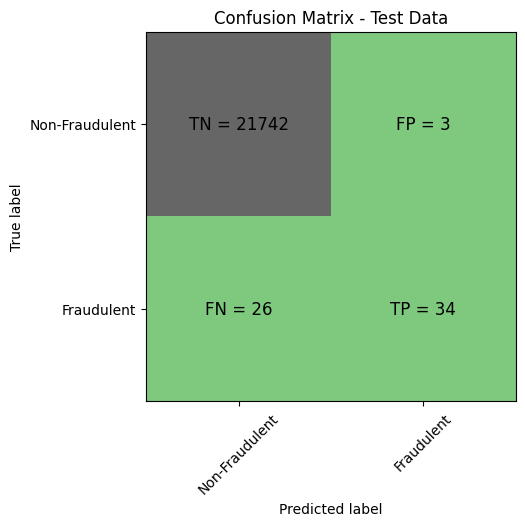

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.92      0.57      0.70        60

    accuracy                           1.00     21805
   macro avg       0.96      0.78      0.85     21805
weighted avg       1.00      1.00      1.00     21805

KNN roc_value: 0.8498
KNN threshold: 0.2000
ROC for the test dataset: 85.0%


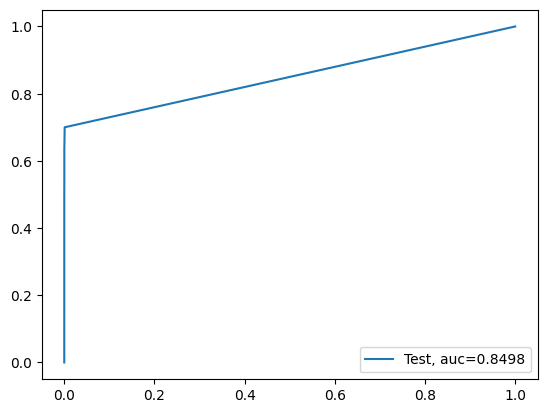

Time Taken by Model: 41.54 seconds
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9990
Confusion Matrix:


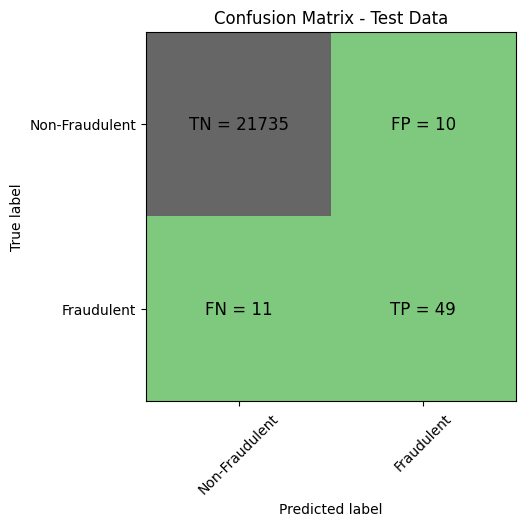

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.83      0.82      0.82        60

    accuracy                           1.00     21805
   macro avg       0.92      0.91      0.91     21805
weighted avg       1.00      1.00      1.00     21805

gini roc_value: 0.9081
Tree threshold: 1.0000
ROC for the test dataset: 90.8%
entropy score: 0.9990
Confusion Matrix:


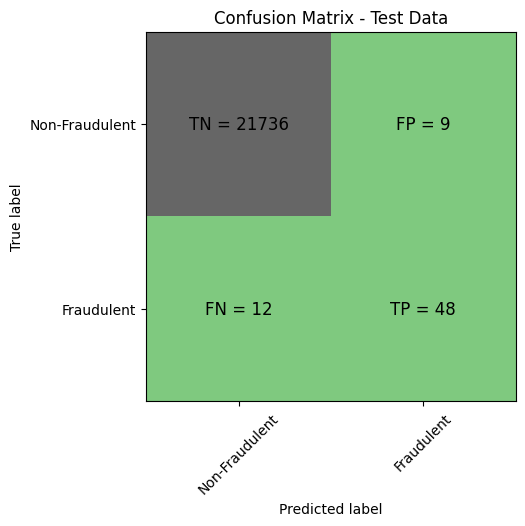

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.84      0.80      0.82        60

    accuracy                           1.00     21805
   macro avg       0.92      0.90      0.91     21805
weighted avg       1.00      1.00      1.00     21805

entropy roc_value: 0.8998
Tree threshold: 1.0000
ROC for the test dataset: 90.0%


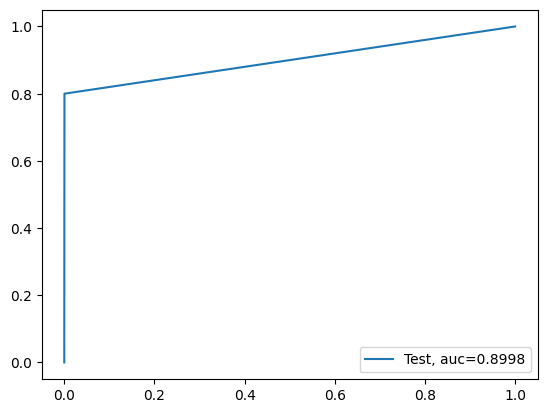

Time Taken by Model: 10.13 seconds
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993
Confusion Matrix:


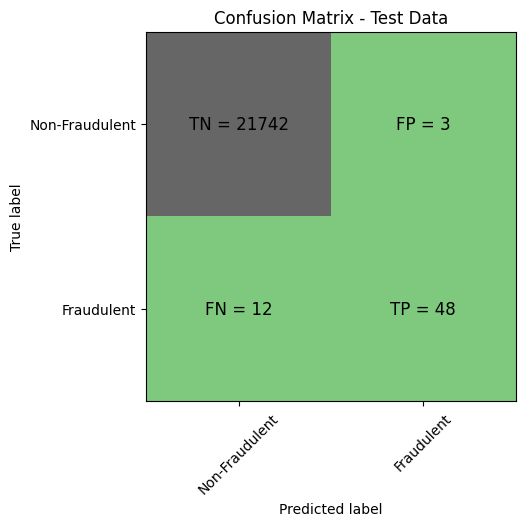

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.94      0.80      0.86        60

    accuracy                           1.00     21805
   macro avg       0.97      0.90      0.93     21805
weighted avg       1.00      1.00      1.00     21805

Random Forest ROC AUC: 0.9487
Random Forest Threshold: 0.0200
ROC AUC for the test dataset: 94.9%


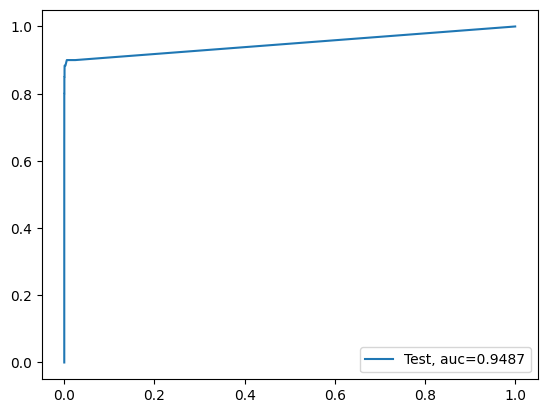

Time Taken by Model: 59.28 seconds
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9993
Confusion Matrix:


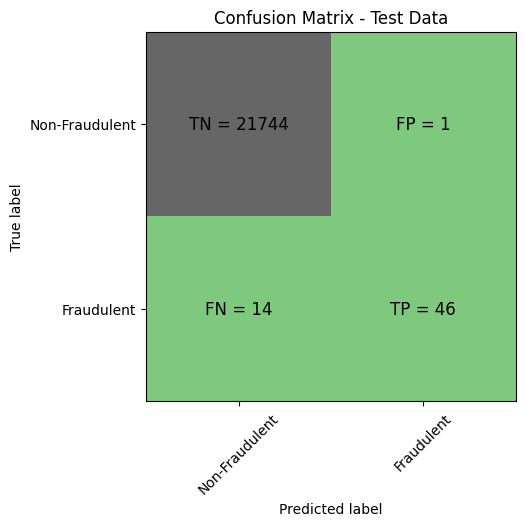

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.98      0.77      0.86        60

    accuracy                           1.00     21805
   macro avg       0.99      0.88      0.93     21805
weighted avg       1.00      1.00      1.00     21805

XGBoost ROC AUC: 0.9695
XGBoost Threshold: 0.0011
ROC AUC for the test dataset: 96.9%


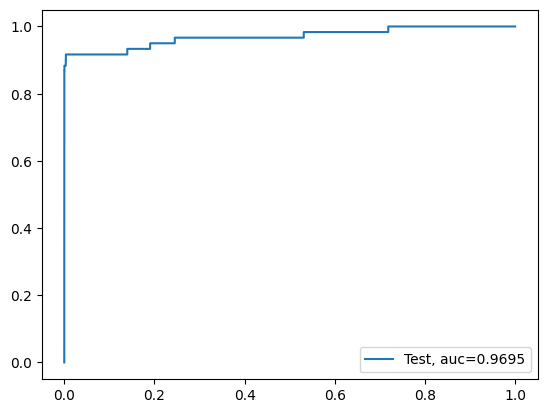

Time Taken by Model: 4.11 seconds ---
------------------------------------------------------------
SVM Model with Sigmoid Kernel
Accuracy Score: 0.9973
Confusion Matrix:


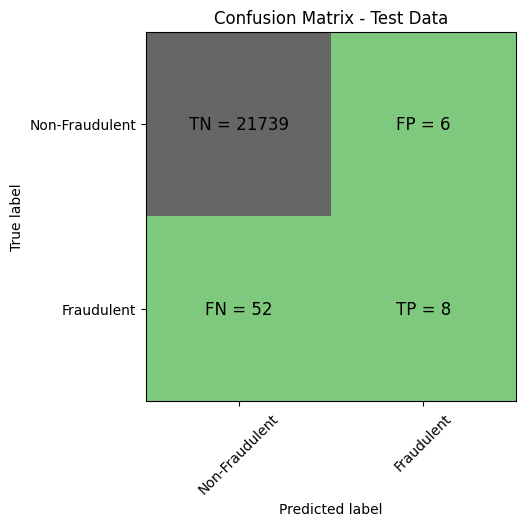

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21745
           1       0.57      0.13      0.22        60

    accuracy                           1.00     21805
   macro avg       0.78      0.57      0.61     21805
weighted avg       1.00      1.00      1.00     21805

SVM ROC AUC: 0.4799
SVM Threshold: 0.0022
ROC AUC for the test dataset: 48.0%


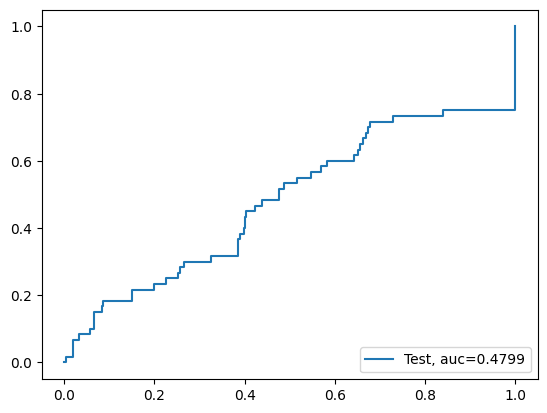

Time Taken by Model: 105.43 seconds
------------------------------------------------------------


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object
target_imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
y_train_cv_imputed = target_imputer.fit_transform(y_train_cv.values.reshape(-1, 1)).flatten()
y_test_cv_imputed = target_imputer.transform(y_test_cv.values.reshape(-1, 1)).flatten()

# Define the threshold value for binary classification
threshold_value = 0.5  # You need to define this based on your problem

# Convert the target variable to binary format for binary classification
y_train_cv_binary = (y_train_cv_imputed > threshold_value).astype(int)
y_test_cv_binary = (y_test_cv_imputed > threshold_value).astype(int)

# Now, continue with your model training
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "StratifiedKFold Cross Validation", X_train_cv_imputed, y_train_cv_binary, X_test_cv_imputed, y_test_cv_binary)
print("Time Taken by Model: %.2f seconds ---" % (time.time() - start_time))
print('-'*60)

# Continue with the rest of your models as before...





# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "StratifiedKFold Cross Validation", X_train_cv_imputed, y_train_cv_binary, X_test_cv_imputed, y_test_cv_binary)
print("Time Taken by Model: %.2f seconds" % (time.time() - start_time))
print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "StratifiedKFold Cross Validation", X_train_cv_imputed, y_train_cv_binary, X_test_cv_imputed, y_test_cv_binary)
print("Time Taken by Model: %.2f seconds" % (time.time() - start_time))
print('-'*60)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "StratifiedKFold Cross Validation", X_train_cv_imputed, y_train_cv_binary, X_test_cv_imputed, y_test_cv_binary)
print("Time Taken by Model: %.2f seconds" % (time.time() - start_time))
print('-'*60)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "StratifiedKFold Cross Validation", X_train_cv_imputed, y_train_cv_binary, X_test_cv_imputed, y_test_cv_binary)
print("Time Taken by Model: %.2f seconds ---" % (time.time() - start_time))
print('-'*60)

# Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results, "StratifiedKFold Cross Validation", X_train_cv_imputed, y_train_cv_binary, X_test_cv_imputed, y_test_cv_binary)
print("Time Taken by Model: %.2f seconds" % (time.time() - start_time))
print('-'*60)


In [ ]:
df_Results

,Methodology,Model,Accuracy,ROC AUC,Threshold,roc_value
0,RepeatedKFold Cross Validation,KNN,0.999266,NaN,NaN,0.933196
0,RepeatedKFold Cross Validation,Random Forest,0.999312,NaN,NaN,0.948673
0,RepeatedKFold Cross Validation,XGBoost,0.999312,NaN,NaN,0.969454
0,RepeatedKFold Cross Validation,SVM,0.997753,NaN,NaN,0.738633
0,StratifiedKFold Cross Validation,KNN,0.998670,NaN,NaN,0.849799
0,StratifiedKFold Cross Validation,Random Forest,0.999312,NaN,NaN,0.948673
0,StratifiedKFold Cross Validation,XGBoost,0.999312,NaN,NaN,0.969454
0,StratifiedKFold Cross Validation,SVM,0.997340,NaN,NaN,0.479922


Results:

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn import metrics
import numpy as np

# Define the values for C and the number of folds for cross-validation
num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Logistic Regression model with L2 regularization
clf = linear_model.LogisticRegressionCV(
    Cs=num_C,
    penalty='l2',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=1000,
    fit_intercept=True,
    solver='newton-cg',
    tol=10
)

# Fit the model to the training data
clf.fit(X_train_KF_cv, y_train_KF_cv)

# Print the maximum AUC-ROC score
print('Max auc_roc for L2:', clf.scores_[1].mean(axis=0).max())

# Print parameters for L2 regularization
print("Parameters for L2 regularization")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

# Find predicted values
y_pred_12 = clf.predict(X_test)

# Find predicted probabilities
y_pred_probs_12 = clf.predict_proba(X_test)[:, 1]

# Calculate accuracy of the model
Accuracy_12 = metrics.accuracy_score(y_pred=y_pred_12, y_true=y_test)
print("Accuracy of Logistic model with L2 regularization: {:.4f}".format(Accuracy_12))

# Calculate ROC AUC score
l2_roc_value = metrics.roc_auc_score(y_test, y_pred_probs_12)
print("L2 roc_value: {:.4f}".format(l2_roc_value))

# Calculate FPR, TPR, and thresholds for


# Calculate FPR, TPR, and thresholds for ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_12)
threshold = thresholds[np.argmax(tpr - fpr)]
print("L2 threshold: {:.4f}".format(threshold))


Max auc_roc for L2: 0.9735727627707288
Parameters for L2 regularization
[[-0.00810643  0.04199935 -0.08397185  0.1540152   0.03094403 -0.03050617
  -0.00488733 -0.06304231 -0.05779166 -0.10243444  0.08469812 -0.14115752
  -0.03285842 -0.25831283  0.01816048 -0.06318559 -0.07345754 -0.00876741
   0.00384976 -0.02163804  0.02779493  0.01533153 -0.00059811 -0.00984084
  -0.0027224   0.01318027 -0.00928211 -0.00556733  0.00027211 -0.00290638]]
[-6.84478319]
{1.0: array([[0.56304355, 0.56369902, 0.569355  , 0.65316079, 0.85934385,
        0.93426361, 0.93519613, 0.97405142, 0.95656317, 0.92278947,
        0.92278947, 0.92278947, 0.92278947, 0.92278947, 0.92278947,
        0.92278947, 0.92278947, 0.92278947, 0.92278947, 0.92278947],
       [0.78459873, 0.78518932, 0.78911018, 0.82705558, 0.93273837,
        0.98777807, 0.98337325, 0.99245357, 0.9884999 , 0.98754019,
        0.98754019, 0.98143743, 0.98143743, 0.98143743, 0.98143743,
        0.98143743, 0.98143743, 0.98143743, 0.98143743, 0.9

ValueError: Input X contains NaN.
LogisticRegressionCV does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
clf.coef_

array([[-0.00810643,  0.04199935, -0.08397185,  0.1540152 ,  0.03094403,
        -0.03050617, -0.00488733, -0.06304231, -0.05779166, -0.10243444,
         0.08469812, -0.14115752, -0.03285842, -0.25831283,  0.01816048,
        -0.06318559, -0.07345754, -0.00876741,  0.00384976, -0.02163804,
         0.02779493,  0.01533153, -0.00059811, -0.00984084, -0.0027224 ,
         0.01318027, -0.00928211, -0.00556733,  0.00027211, -0.00290638]])

In [ ]:
import pandas as pd

# Concatenate feature names and coefficients into a DataFrame
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(clf.coef_))], axis=1)

# Rename columns
coefficients.columns = ['Feature', 'Importance Coefficient']


In [ ]:
coefficients

,Feature,Importance Coefficient
0,V1,-0.008106
1,V2,0.041999
2,V3,-0.083972
3,V4,0.154015
4,V5,0.030944
5,V6,-0.030506
6,V7,-0.004887
7,V8,-0.063042
8,V9,-0.057792
9,V10,-0.102434


print

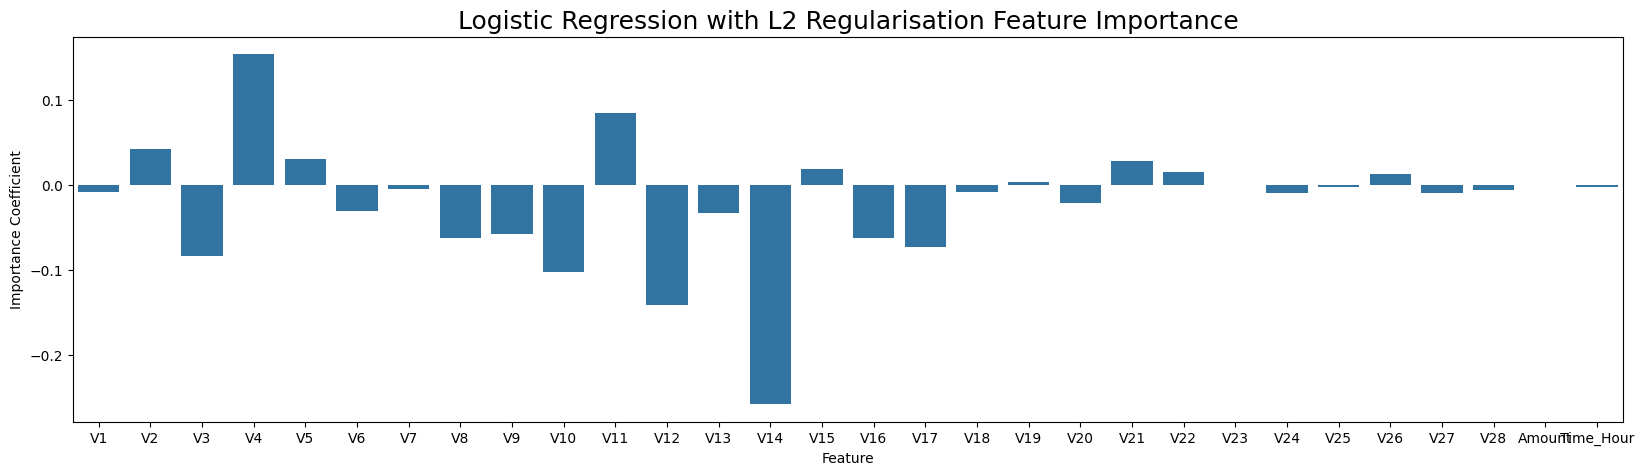

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)
plt.show()


Model Building

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Drop rows with NaN values from both X_train and y_train
    X_train = X_train.dropna()
    y_train = y_train.dropna()

    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over = ROS.fit_resample(X_train, y_train)

    # Convert X_over to DataFrame with appropriate column names (assuming cols is defined)
    X_over = pd.DataFrame(data=X_over, columns=cols)


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.8507340471200999
Max auc_roc for L2: 0.9865914512175848
Parameters for L1 regularizations
[[-6.31334489e-03  4.71160713e-03 -1.15384419e-02  6.15513767e-03
  -4.34577160e-03 -2.23888606e-03 -7.20678104e-03  1.60919341e-03
  -3.58316461e-03 -8.11795841e-03  5.04852860e-03 -9.32717511e-03
  -2.42632474e-04 -1.07915295e-02 -1.29547723e-04 -6.39989167e-03
  -1.11125342e-02 -3.46858998e-03  1.01741724e-03  2.69917468e-04
   1.69417650e-03 -2.45417584e-05  1.54899012e-06 -1.33794928e-04
  -1.29778626e-04  2.76729862e-05  5.89412847e-04  7.81977167e-05
  -1.01653175e-03 -1.77610751e-02]]
[-0.00204383]
{1.0: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.57398615,
        0.62293936, 0.71886762, 0.76133139, 0.77623854, 0.78844485,
        0.79822351, 0.80480762, 0.81012201, 0.81620717, 0.82260466,
        0.82716849, 0.83100703, 0.83530553, 0.83919952, 0.8427543 ],
       [0.5       , 0.5       , 0.5       , 0.5

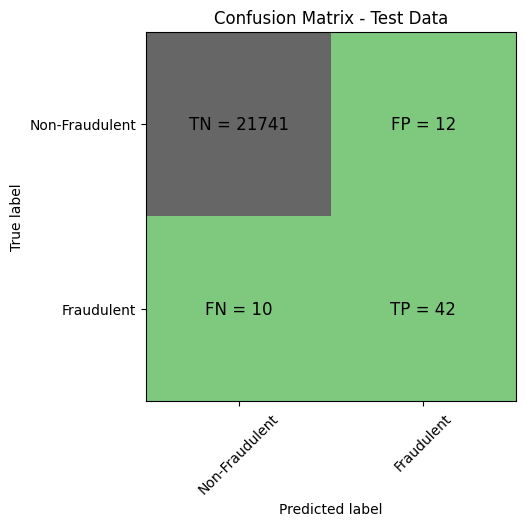

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21753
         1.0       0.78      0.81      0.79        52

    accuracy                           1.00     21805
   macro avg       0.89      0.90      0.90     21805
weighted avg       1.00      1.00      1.00     21805

KNN roc_value: 0.9037
KNN threshold: 1.0000
ROC for the test dataset: 90.4%


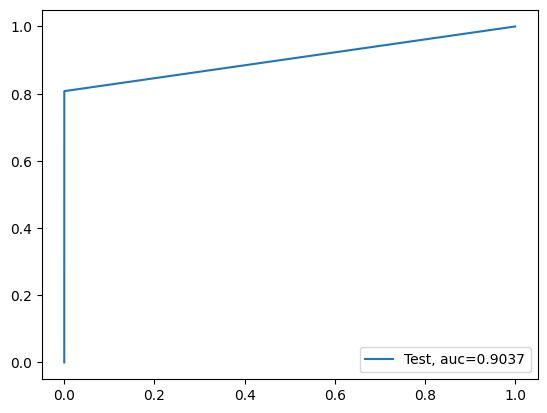

Time Taken by Model: 59.75113773345947 seconds
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9989
Confusion Matrix:


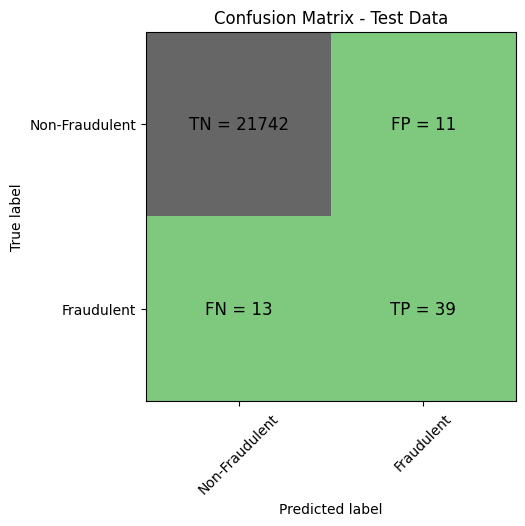

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21753
         1.0       0.78      0.75      0.76        52

    accuracy                           1.00     21805
   macro avg       0.89      0.87      0.88     21805
weighted avg       1.00      1.00      1.00     21805

gini roc_value: 0.8747
Tree threshold: 1.0000
ROC for the test dataset: 87.5%
entropy score: 0.9991
Confusion Matrix:


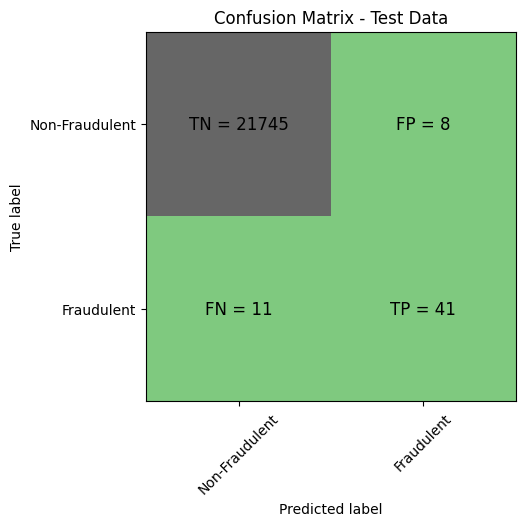

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21753
         1.0       0.84      0.79      0.81        52

    accuracy                           1.00     21805
   macro avg       0.92      0.89      0.91     21805
weighted avg       1.00      1.00      1.00     21805

entropy roc_value: 0.8940
Tree threshold: 1.0000
ROC for the test dataset: 89.4%


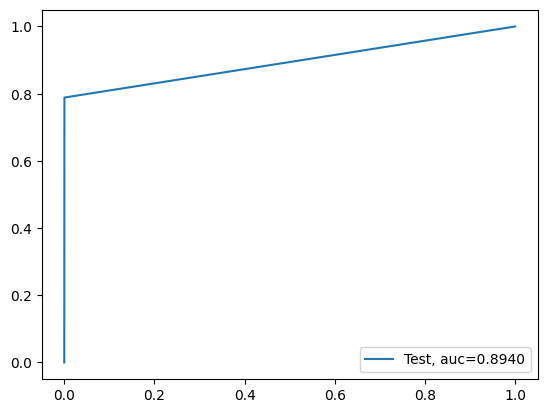

Time Taken by Model: 7.287636041641235 seconds
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9995
Confusion Matrix:


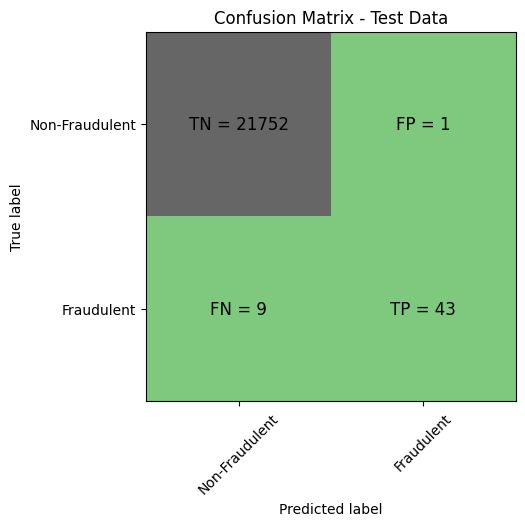

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21753
         1.0       0.98      0.83      0.90        52

    accuracy                           1.00     21805
   macro avg       0.99      0.91      0.95     21805
weighted avg       1.00      1.00      1.00     21805

Random Forest ROC AUC: 0.9504
Random Forest Threshold: 0.2400
ROC AUC for the test dataset: 95.0%


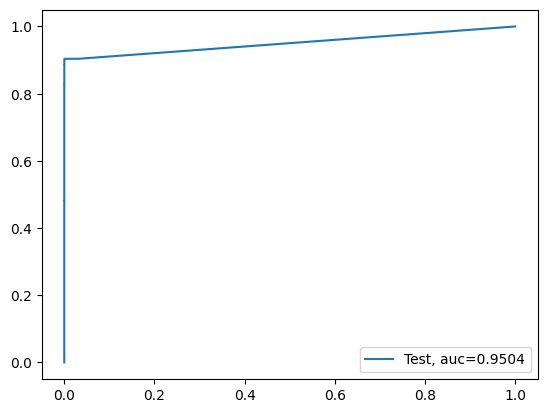

Time Taken by Model: 54.01984906196594 seconds
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996
Confusion Matrix:


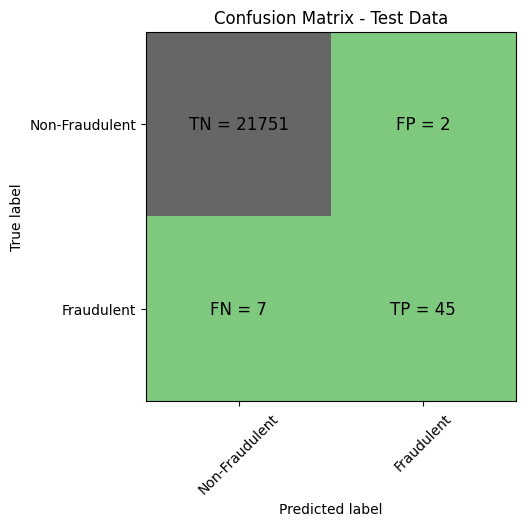

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21753
         1.0       0.96      0.87      0.91        52

    accuracy                           1.00     21805
   macro avg       0.98      0.93      0.95     21805
weighted avg       1.00      1.00      1.00     21805

XGBoost ROC AUC: 0.9695
XGBoost Threshold: 0.0014
ROC AUC for the test dataset: 96.9%


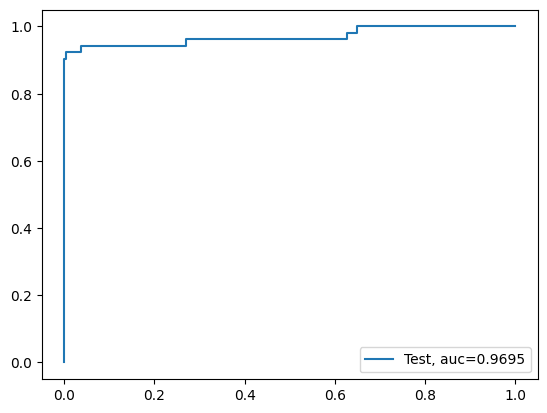

Time Taken by Model: 4.904674291610718 seconds ---
------------------------------------------------------------
Logistic Regression with L1 And L2 Regularisation


NameError: name 'max_auc_roc_11' is not defined

In [ ]:
Data_Imbalance_Handling = "Random Oversampling with StratifiedKFold CV"

# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")

start_time = time.time()

df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)

print("Time Taken by Model: %s seconds" % (time.time() - start_time))

print('-'*60)

# Run KNN Model
print("KNN Model")

start_time = time.time()

df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)

print("Time Taken by Model: %s seconds" % (time.time() - start_time))

print('-'*60)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")

start_time = time.time()

df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)

print("Time Taken by Model: %s seconds" % (time.time() - start_time))

print('-'*60)

# Run Random Forest Model
print("Random Forest Model")

start_time = time.time()

df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)

print("Time Taken by Model: %s seconds" % (time.time() - start_time))

print('-'*60)

# Run XGBoost Model
print("XGBoost Model")

start_time = time.time()

df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)

print("Time Taken by Model: %s seconds ---" % (time.time() - start_time))

print('-'*60)

# Results from Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
print("Max auc_roc for L1:", max_auc_roc_11)
print("Max auc_roc for L2:", max_auc_roc_12)


In [ ]:
df_Results

,Methodology,Model,Accuracy,ROC AUC,Threshold,roc_value
0,RepeatedKFold Cross Validation,KNN,0.999266,NaN,NaN,0.933196
0,RepeatedKFold Cross Validation,Random Forest,0.999312,NaN,NaN,0.948673
0,RepeatedKFold Cross Validation,XGBoost,0.999312,NaN,NaN,0.969454
0,RepeatedKFold Cross Validation,SVM,0.997753,NaN,NaN,0.738633
0,StratifiedKFold Cross Validation,KNN,0.998670,NaN,NaN,0.849799
0,StratifiedKFold Cross Validation,Random Forest,0.999312,NaN,NaN,0.948673
0,StratifiedKFold Cross Validation,XGBoost,0.999312,NaN,NaN,0.969454
0,StratifiedKFold Cross Validation,SVM,0.997340,NaN,NaN,0.479922
0,Random Oversampling with StratifiedKFold CV,KNN,0.998991,NaN,NaN,0.903729
0,Random Oversampling with StratifiedKFold CV,Random Forest,0.999541,NaN,NaN,0.950384


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    # Check for missing target values and drop corresponding rows
    missing_values_index = y_train[y_train.isnull()].index
    if not missing_values_index.empty:
        X_train = X_train.drop(index=missing_values_index)
        y_train = y_train.drop(index=missing_values_index)
        print("Dropped rows with missing target values.")

    smote = SMOTE(random_state=0)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    X_train_smote = pd.DataFrame(data=X_train_smote, columns=cols)


Dropped rows with missing target values.
Dropped rows with missing target values.
Dropped rows with missing target values.
Dropped rows with missing target values.


Logistic Regression with L1 And L2 Regularization
Max auc_roc for L1: 0.9546331934180528
Max auc_roc for L2: 0.9950642150317668
Parameters for L1 regularizations
[[-9.74682378e-03  7.96389638e-03 -1.58223416e-02  8.60265186e-03
  -6.36484749e-03 -2.74294464e-03 -1.09699167e-02  1.42058712e-03
  -4.44104211e-03 -1.07911585e-02  7.62193619e-03 -1.26317403e-02
  -2.12741784e-04 -1.46121386e-02 -7.41425536e-05 -8.41803936e-03
  -1.40376301e-02 -4.35035169e-03  1.16641646e-03  2.26977371e-04
   3.08097596e-03 -5.31363346e-04  9.68610916e-05 -2.95458598e-04
   1.02490530e-04  7.69838890e-05  1.03019595e-03  2.36935166e-04
   5.69870069e-05 -9.17524550e-03]]
[-0.0004972]
{1.0: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.4369771 ,
        0.8101586 , 0.88145884, 0.91212575, 0.92857055, 0.93828266,
        0.94485518, 0.94870915, 0.9514472 , 0.952502  , 0.9532439 ,
        0.95392086, 0.95418688, 0.95441228, 0.95443362, 0.95429762],
       [0.5       , 0.5       , 0.5       , 0.5 

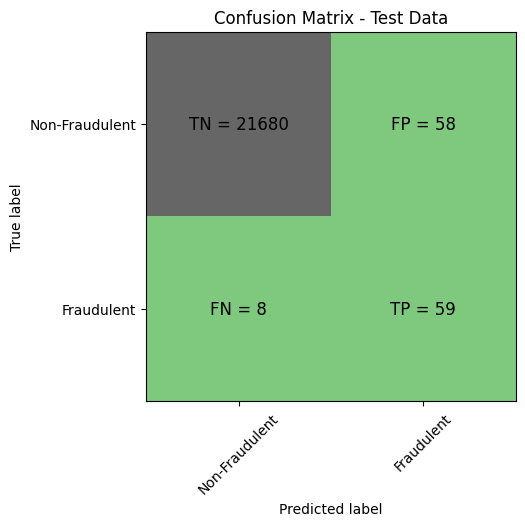

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21738
         1.0       0.50      0.88      0.64        67

    accuracy                           1.00     21805
   macro avg       0.75      0.94      0.82     21805
weighted avg       1.00      1.00      1.00     21805

KNN roc_value: 0.9396
KNN threshold: 0.6000
ROC for the test dataset: 94.0%


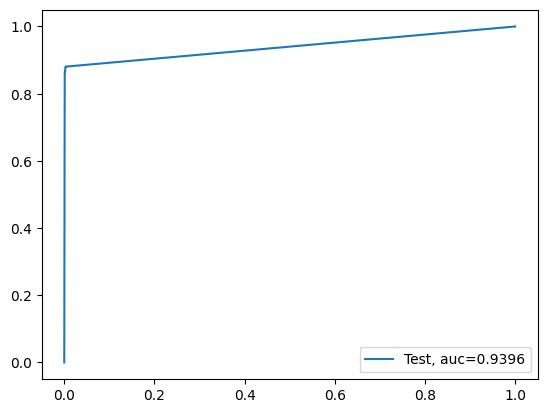

Time Taken by Model: 98.14486718177795 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9982
Confusion Matrix:


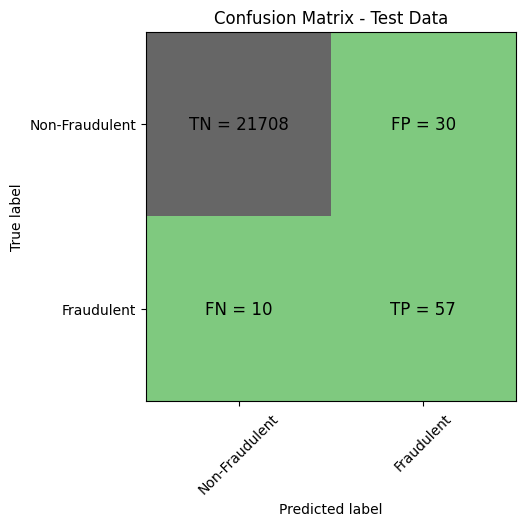

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21738
         1.0       0.66      0.85      0.74        67

    accuracy                           1.00     21805
   macro avg       0.83      0.92      0.87     21805
weighted avg       1.00      1.00      1.00     21805

gini roc_value: 0.9247
Tree threshold: 1.0000
ROC for the test dataset: 92.5%
entropy score: 0.9983
Confusion Matrix:


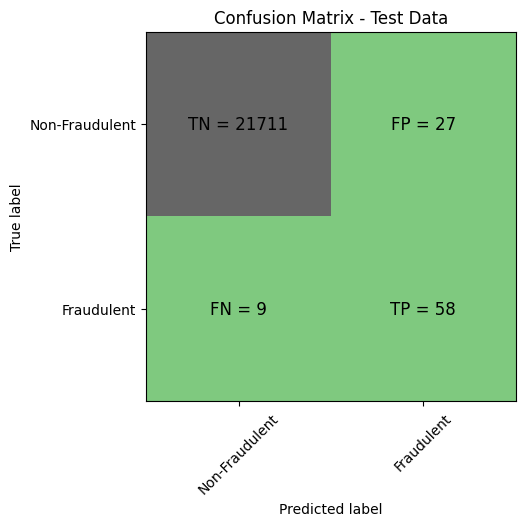

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21738
         1.0       0.68      0.87      0.76        67

    accuracy                           1.00     21805
   macro avg       0.84      0.93      0.88     21805
weighted avg       1.00      1.00      1.00     21805

entropy roc_value: 0.9322
Tree threshold: 1.0000
ROC for the test dataset: 93.2%


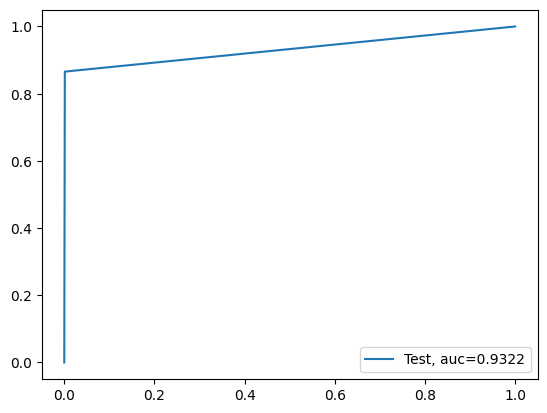

Time Taken by Model: 30.808796882629395 seconds
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994
Confusion Matrix:


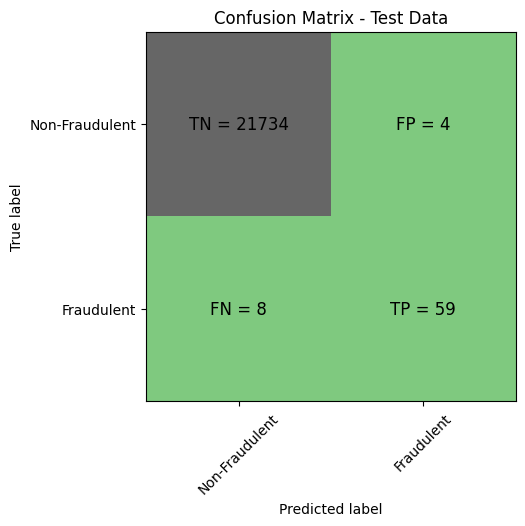

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21738
         1.0       0.94      0.88      0.91        67

    accuracy                           1.00     21805
   macro avg       0.97      0.94      0.95     21805
weighted avg       1.00      1.00      1.00     21805

Random Forest ROC AUC: 0.9826
Random Forest Threshold: 0.0500
ROC AUC for the test dataset: 98.3%


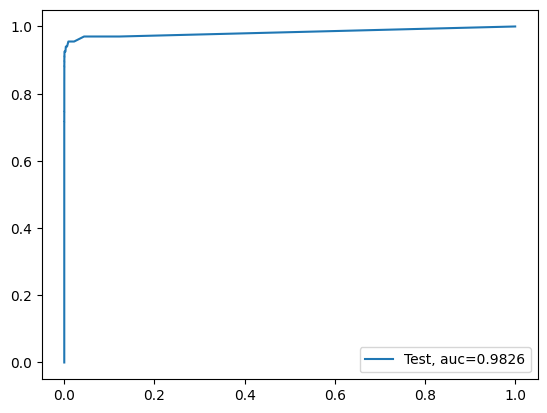

Time Taken by Model: 133.9486653804779 seconds
--------------------------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994
Confusion Matrix:


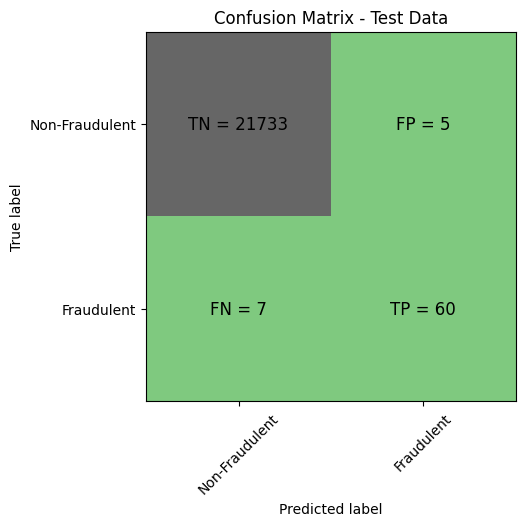

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21738
         1.0       0.92      0.90      0.91        67

    accuracy                           1.00     21805
   macro avg       0.96      0.95      0.95     21805
weighted avg       1.00      1.00      1.00     21805

XGBoost ROC AUC: 0.9837
XGBoost Threshold: 0.0006
ROC AUC for the test dataset: 98.4%


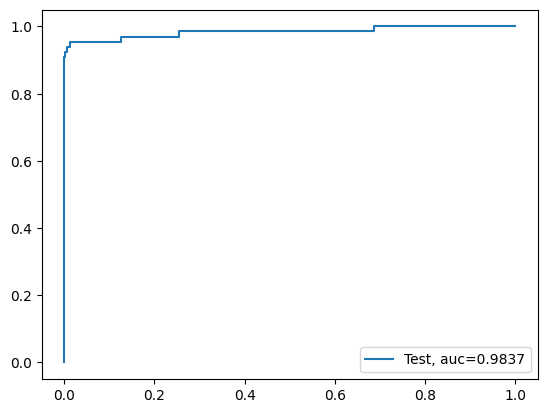

Time Taken by Model: 5.0597968101501465 seconds ---
--------------------------------------------------------------------------------


In [ ]:
Data_Imbalance_Handling = "SMOTE Oversampling with StratifiedKFold CV"

# Run Logistic Regression with L1 And L2 Regularization
print("Logistic Regression with L1 And L2 Regularization")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 80)

# Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: %s seconds ---" % (time.time() - start_time))
print('-' * 80)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 80)

# Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: %s seconds" % (time.time() - start_time))
print('-' * 80)

# Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_smote, y_train_smote, X_test, y_test)
print("Time Taken by Model: %s seconds ---" % (time.time() - start_time))
print('-' * 80)


In [ ]:
import numpy as np

# Drop rows with missing target values
missing_indices = y[y.isnull()].index
X = X.drop(missing_indices)
y = y.drop(missing_indices)

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]

    adasyn = ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN = adasyn.fit_resample(X_train, y_train)

    X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns=cols)


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for L1: 0.7907870014838739
Max auc_roc for L2: 0.9896656566605054
Parameters for L1 regularizations
[[-4.70442174e-03  4.78419998e-03 -9.09474666e-03  6.98126011e-03
  -3.41645332e-03 -2.30859857e-03 -5.52068355e-03  1.25805348e-03
  -3.12023252e-03 -8.02697971e-03  5.51366390e-03 -1.01693906e-02
  -4.04087809e-04 -1.18369436e-02  4.42675189e-04 -6.73629595e-03
  -1.20023687e-02 -3.79637133e-03  8.69987846e-04 -3.29810375e-04
   1.49730376e-03  1.95444824e-04  6.53483083e-06 -1.33576769e-04
  -1.65280126e-04 -2.04043815e-04  3.03507799e-04 -2.66257274e-05
   9.42658328e-04 -9.18014422e-03]]
[-0.0007242]
{1.0: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.55917264,
        0.58029351, 0.62483946, 0.65615049, 0.67885054, 0.6974322 ,
        0.7130017 , 0.72564019, 0.73650337, 0.74627886, 0.75469547,
        0.76244663, 0.76929589, 0.77550672, 0.78117632, 0.78641489],
       [0.5       , 0.5       , 0.5       , 0.5 

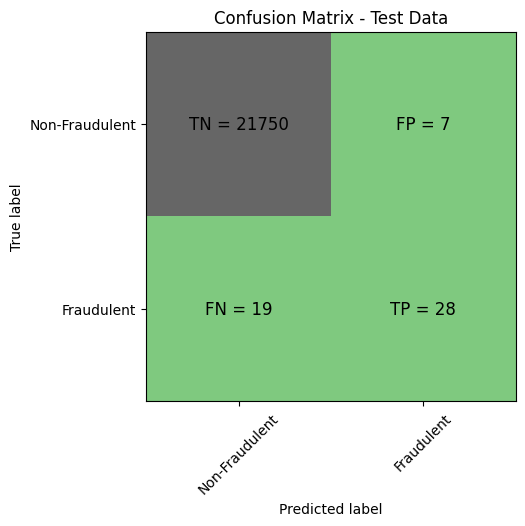

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21757
         1.0       0.80      0.60      0.68        47

    accuracy                           1.00     21804
   macro avg       0.90      0.80      0.84     21804
weighted avg       1.00      1.00      1.00     21804

KNN roc_value: 0.7977
KNN threshold: 0.8000
ROC for the test dataset: 79.8%


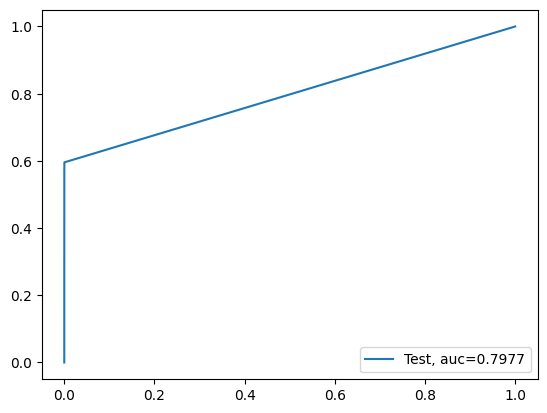

Time Taken by Model: 77.74252676963806 seconds ---
--------------------------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9973
Confusion Matrix:


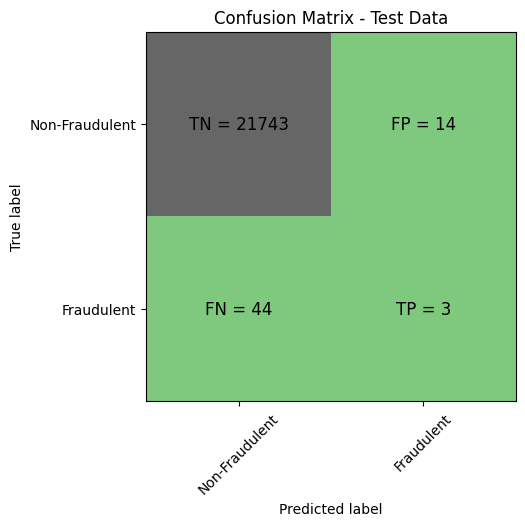

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21757
         1.0       0.18      0.06      0.09        47

    accuracy                           1.00     21804
   macro avg       0.59      0.53      0.55     21804
weighted avg       1.00      1.00      1.00     21804

gini roc_value: 0.5316
Tree threshold: 1.0000
ROC for the test dataset: 53.2%
entropy score: 0.9985
Confusion Matrix:


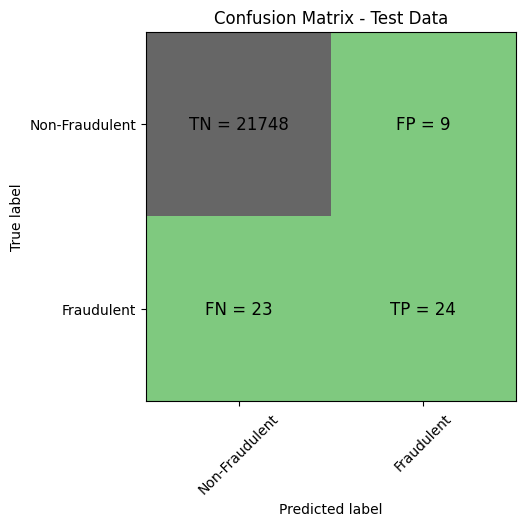

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21757
         1.0       0.73      0.51      0.60        47

    accuracy                           1.00     21804
   macro avg       0.86      0.76      0.80     21804
weighted avg       1.00      1.00      1.00     21804

entropy roc_value: 0.7551
Tree threshold: 1.0000
ROC for the test dataset: 75.5%


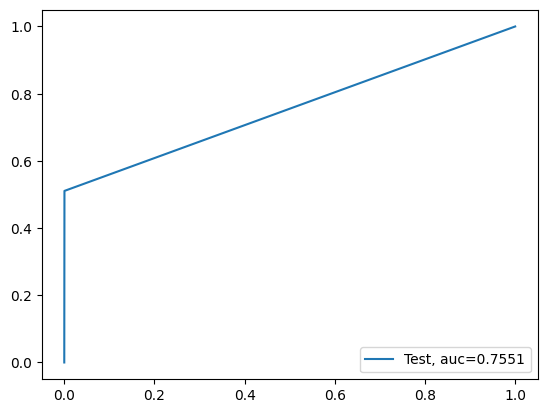

Time Taken by Model: 28.70198917388916 seconds ---
--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9992
Confusion Matrix:


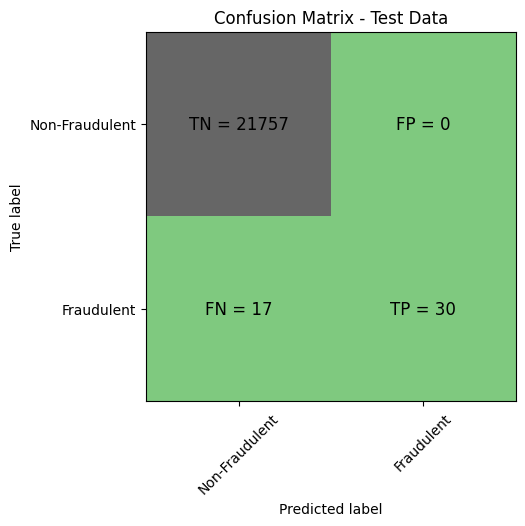

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21757
         1.0       1.00      0.64      0.78        47

    accuracy                           1.00     21804
   macro avg       1.00      0.82      0.89     21804
weighted avg       1.00      1.00      1.00     21804

Random Forest ROC AUC: 0.9200
Random Forest Threshold: 0.0200
ROC AUC for the test dataset: 92.0%


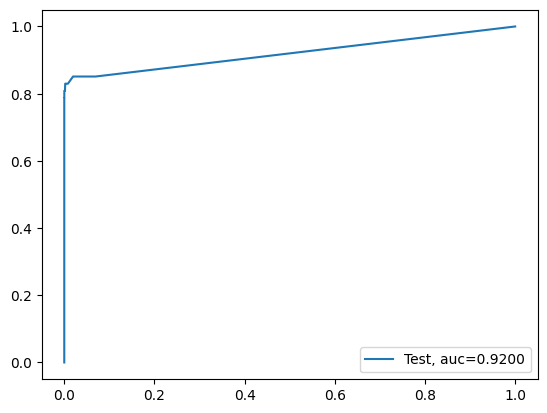

Time Taken by Model: 128.77076196670532 seconds ---
--------------------------------------------------------------------------------


In [ ]:
# Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")

start_time = time.time()

df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)

print("Time Taken by Model: %s seconds ---" % (time.time() - start_time))

print('-' * 80)

# Run KNN Model
print("KNN Model")

start_time = time.time()

df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)

print("Time Taken by Model: %s seconds ---" % (time.time() - start_time))

print('-' * 80)

# Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")

start_time = time.time()

df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)

print("Time Taken by Model: %s seconds ---" % (time.time() - start_time))

print('-' * 80)

# Run Random Forest Model
print("Random Forest Model")

start_time = time.time()

df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)

print("Time Taken by Model: %s seconds ---" % (time.time() - start_time))

print('-' * 80)


In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators': range(60, 130, 10),
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2],
    'gamma': [1/10.0 for i in range(0, 5)],
    'subsample': [i/10.0 for i in range(7, 10)],
    'colsample_bytree': [1/10.0 for i in range(7, 10)]
}

gsearch1 = RandomizedSearchCV(
    estimator=XGBClassifier(
        base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, max_delta_step=0, missing=None, n_jobs=-1,
        nthread=None, objective='binary:logistic', random_state=42,
        reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
        silent=None, verbosity=1
    ),
    param_distributions=param_test, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5
)

gsearch1.fit(X_over, y_over)

print("CV Results:", gsearch1.cv_results_)
print("Best Params:", gsearch1.best_params_)
print("Best Score:", gsearch1.best_score_)


CV Results: {'mean_fit_time': array([5.83699288, 5.02333884, 3.36243377, 3.45101657, 4.26751375]), 'std_fit_time': array([1.38035982, 0.57015453, 0.44009331, 0.64454318, 1.05934689]), 'mean_score_time': array([0.02283921, 0.02161856, 0.01716266, 0.01649184, 0.01626787]), 'std_score_time': array([0.00996652, 0.00589118, 0.0082199 , 0.00282788, 0.00575627]), 'param_subsample': masked_array(data=[0.9, 0.8, 0.9, 0.9, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[120, 120, 70, 70, 90],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 3, 3, 5],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[9, 7, 7, 7, 9],
             mask=[False, False, False, False, False],
       fill_value='?',
     

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming X_test is your test data
# Replace missing values with a specific value or impute them using an appropriate strategy
X_test = X_test.fillna(0)  # Replace NaNs with 0, or use other strategies like mean, median, etc.

# Then proceed with fitting the model
# Create XGBoost classifier with selected hyperparameters
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1,
                    colsample_bytree=0.7, gamma=0.2, learning_rate=0.125, max_delta_step=0,
                    max_depth=7, min_child_weight=5, missing=np.nan, n_estimators=60, n_jobs=1,
                    nthread=None, objective='binary:logistic', random_state=42, reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=0.8,
                    verbosity=1)

# Fit the classifier on the training data
clf.fit(X_train_ADASYN, y_train_ADASYN)

# Calculate model accuracy
XGB_test_score = clf.score(X_test, y_test)
print("Model Accuracy: {0}".format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost roc_value: {0}".format(XGB_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)

# Calculate threshold
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost threshold: {0}".format(threshold))


Model Accuracy: 0.9994037791230966
XGBoost roc_value: 0.9284470930852287
XGBoost threshold: 0.29035016894340515


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

# Assuming X_test is your test data
# Replace missing values with a specific value or impute them using an appropriate strategy
X_test = X_test.fillna(0)  # Replace NaNs with 0, or use other strategies like mean, median, etc.

# Then proceed with fitting the model
# Create XGBoost classifier with selected hyperparameters
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1,
                    colsample_bytree=0.7, gamma=0.2, learning_rate=0.125, max_delta_step=0,
                    max_depth=7, min_child_weight=5, missing=np.nan, n_estimators=60, n_jobs=1,
                    nthread=None, objective='binary:logistic', random_state=42, reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=0.8,
                    verbosity=1)

# Fit the classifier on the training data
clf.fit(X_train_ADASYN, y_train_ADASYN)

# Calculate model accuracy
XGB_test_score = clf.score(X_test, y_test)
print("Model Accuracy: {0}".format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
XGB_roc_value = roc_auc_score(y_test, XGB_probs)
print("XGBoost roc_value: {0}".format(XGB_roc_value))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, XGB_probs)

# Calculate threshold
threshold = thresholds[np.argmax(tpr - fpr)]
print("XGBoost threshold: {0}".format(threshold))


Model Accuracy: 0.9994037791230966
XGBoost roc_value: 0.9284470930852287
XGBoost threshold: 0.29035016894340515


In [ ]:
imp_var = []

for i in clf.feature_importances_:
    imp_var.append(i)

top_var_index = imp_var.index(np.sort(clf.feature_importances_)[-1]) + 1
second_top_var_index = imp_var.index(np.sort(clf.feature_importances_)[-2]) + 1
third_top_var_index = imp_var.index(np.sort(clf.feature_importances_)[-3]) + 1

print('Top var:', top_var_index)
print('2nd Top var:', second_top_var_index)
print('3rd Top var:', third_top_var_index)


Top var: 17
2nd Top var: 14
3rd Top var: 4


In [ ]:
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGBoost roc_value:", XGB_roc_value)

fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)

threshold = thresholds[np.argmax(tpr - fpr)]

print("XGBoost threshold:", threshold)


XGBoost roc_value: 0.9284470930852287
XGBoost threshold: 0.29035017
